# Video game sales analysis

# Contenido <a id='back'></a>

* [Introducción](#intro)
* [1. Información general](#general_info)
    * [Conclusiones](#general_info_conclusions)
* [2. Preprocesamiento de datos](#data_preprocessing)
    * [2.1 Estilo del encabezado](#header_style)
    * [2.2 Valores ausentes](#missing_values)
    * [2.3 Duplicados](#duplicates)
    * [2.4 Tipos de dato](#data_types)
    * [2.5 Columna de ventas totales para cada juego](#total_sales)
    * [2.6 Conclusiones](#data_preprocessing_conclusions)
* [3. Análisis de datos](#data_analysis)
    * [3.1 Total de juegos lanzados en cada año](#total_games_year)
    * [3.2 Ventas totales por plataforma](#total_sales_platforms)
    * [3.3 Ventas anuales de plataformas con mayores ventas](#anual_sales_platforms)
    * [3.4 Selección de datos relevantes](#relevant_data)
    * [3.5 Plataformas líderes en ventas](#leader_sales_platforms)
    * [3.6 Diagrama de caja de ventas globales](#global_sales)
    * [3.7 Correlación entre reseñas y ventas](#corr_reviews_sales)
    * [3.8 Comparación de ventas de los mismos juegos en otras plataformas](#comparison_sales_games)
    * [3.9 Distribución general de juegos por género](#genre_games)
* [4. Perfil de usuario para cada región](#user_profiles)
    * [4.1 Perfil de Norteamérica](#na_profile)
        * [4.1.1 Plataformas principales](#na_platforms)
        * [4.1.2 Cuotas de mercado](#na_market_share)
        * [4.1.3 Géneros principales](#na_genres)
        * [4.1.4 Efecto de las clasificaciones ESRB en las ventas regionales](#na_esrb)
    * [4.2 Perfil de Europa](#eu_profile)
        * [4.2.1 Plataformas principales](#eu_platforms)
        * [4.2.2 Cuotas de mercado](#eu_market_share)
        * [4.2.3 Géneros principales](#eu_genres)
        * [4.2.4 Efecto de las clasificaciones ESRB en las ventas regionales](#eu_esrb)
    * [4.3 Perfil de Japón](#jp_profile)
        * [4.3.1 Plataformas principales](#jp_platforms)
        * [4.3.2 Cuotas de mercado](#jp_market_share)
        * [4.3.3 Géneros principales](#jp_genres)
        * [4.3.4 Efecto de las clasificaciones ESRB en las ventas regionales](#jp_esrb)
    * [4.4 Conclusiones](#user_profiles_conclusions)
        * [4.4.1 Plataformas principales](#platforms_conclusions)
        * [4.4.2 Cuotas de mercado](#market_share_conclusions)
        * [4.4.3 Géneros principales](#genres_conclusions)
        * [4.4.4 Efecto de las clasificaciones ESRB en las ventas regionales](#esrb_conclusions)
* [5. Pruebas de hipótesis](#hypothesis_testing)
    * [5.1 Las calificaciones promedio de los usuarios para las plataformas Xbox One y PC son las mismas](#scores_xone_pc)
    * [5.2 Las calificaciones promedio de los usuarios para los géneros de Acción y Deportes son diferentes](#scores_action_sports)
* [6. Conclusión general](#general_conclusion)

## Introducción <a id='intro'></a>

La tienda online Ice vende videojuegos por todo el mundo y le interesa identificar patrones que le permitan detectar proyectos prometedores y planificar campañas publicitarias. 

Para ello se cuenta con una base de datos históricos con las reseñas de usuarios y expertos, los géneros, las plataformas de videojuegos y las ventas de juegos en diferentes regiones. Estos se remontan a 2016.

### Etapas

Se empezará revisando de manera general la base de datos para, con base en los descrubrimientos anteriores, limpiarla en caso de ser necesario a través del preprocesamiento de datos. Posteriormente se hará una análisis de los datos, donde se estudiaran los juegos lanzados, las ventas totales, los años relevantes para el análisis, entre otros. También se hará un perfil de usuario para las regiones de Norteamérica, Europa y Japón. Finalmente, se harán dos pruebas de hipótesis donde se analizará si las calificaciones de los usuarios para las plataformas de Xbox One y PC, así como para los géneros de Acción y Deportes son iguales o diferentes.

## 1. Información general <a id='general_info'></a>

Abrimos la base de datos de videojuegos y la examinamos.

In [ ]:
# Importar librerías

# Librerías de terceros
import matplotlib.pyplot as plt
import numpy as np
import pandas as pd
import seaborn as sns
from scipy import stats as st
from scipy.stats import levene

In [ ]:
# Cargar la base de datos
data = pd.read_csv('/datasets/games.csv')

display(data.sample(5))

                                             Name Platform  Year_of_Release  \
9900   A.C.E.: Another Century's Episode Portable      PSP           2011.0   
7257                        Naruto: Ninja Council      GBA           2003.0   
4042        Star Wars Battlefront: Elite Squadron       DS           2009.0   
13073                             Sigma Star Saga      GBA           2005.0   
4191                                      FIFA 12       PC           2011.0   

              Genre  NA_sales  EU_sales  JP_sales  Other_sales  Critic_Score  \
9900     Simulation      0.00      0.00      0.12         0.00           NaN   
7257         Action      0.16      0.06      0.00         0.00          60.0   
4042        Shooter      0.42      0.03      0.00         0.04          61.0   
13073  Role-Playing      0.04      0.01      0.00         0.00          68.0   
4191         Sports      0.04      0.33      0.00         0.10           NaN   

      User_Score Rating  
9900         NaN  

In [3]:
# Obtenemos información general de la base de datos
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 16715 entries, 0 to 16714
Data columns (total 11 columns):
 #   Column           Non-Null Count  Dtype  
---  ------           --------------  -----  
 0   Name             16713 non-null  object 
 1   Platform         16715 non-null  object 
 2   Year_of_Release  16446 non-null  float64
 3   Genre            16713 non-null  object 
 4   NA_sales         16715 non-null  float64
 5   EU_sales         16715 non-null  float64
 6   JP_sales         16715 non-null  float64
 7   Other_sales      16715 non-null  float64
 8   Critic_Score     8137 non-null   float64
 9   User_Score       10014 non-null  object 
 10  Rating           9949 non-null   object 
dtypes: float64(6), object(5)
memory usage: 1.4+ MB


In [ ]:
# Obtenemos datos estadísticos de la base de datos
data.describe()

In [4]:
# Analizamos los datos cuantitativos de las columnas Critic_Score y User_Score
print(data["Critic_Score"].unique())
print("\n")
print(data["User_Score"].unique())

[76. nan 82. 80. 89. 58. 87. 91. 61. 97. 95. 77. 88. 83. 94. 93. 85. 86.
 98. 96. 90. 84. 73. 74. 78. 92. 71. 72. 68. 62. 49. 67. 81. 66. 56. 79.
 70. 59. 64. 75. 60. 63. 69. 50. 25. 42. 44. 55. 48. 57. 29. 47. 65. 54.
 20. 53. 37. 38. 33. 52. 30. 32. 43. 45. 51. 40. 46. 39. 34. 35. 41. 36.
 28. 31. 27. 26. 19. 23. 24. 21. 17. 22. 13.]


['8' nan '8.3' '8.5' '6.6' '8.4' '8.6' '7.7' '6.3' '7.4' '8.2' '9' '7.9'
 '8.1' '8.7' '7.1' '3.4' '5.3' '4.8' '3.2' '8.9' '6.4' '7.8' '7.5' '2.6'
 '7.2' '9.2' '7' '7.3' '4.3' '7.6' '5.7' '5' '9.1' '6.5' 'tbd' '8.8' '6.9'
 '9.4' '6.8' '6.1' '6.7' '5.4' '4' '4.9' '4.5' '9.3' '6.2' '4.2' '6' '3.7'
 '4.1' '5.8' '5.6' '5.5' '4.4' '4.6' '5.9' '3.9' '3.1' '2.9' '5.2' '3.3'
 '4.7' '5.1' '3.5' '2.5' '1.9' '3' '2.7' '2.2' '2' '9.5' '2.1' '3.6' '2.8'
 '1.8' '3.8' '0' '1.6' '9.6' '2.4' '1.7' '1.1' '0.3' '1.5' '0.7' '1.2'
 '2.3' '0.5' '1.3' '0.2' '0.6' '1.4' '0.9' '1' '9.7']


### Conclusiones <a id='general_info_conclusions'></a>

La base de datos cuenta con 11 columnas y 16,715 filas, donde:
- La columna 'Year_of_Release' tiene un tipo de datos flotante, el cual no es un tipo de dato adecuado para la información que contiene.
- La columna 'Critic_Score' tiene un tipo de datos flotante y, dado que para esta puntuación no se usan puntos decimales, tenerlo como flotante hace que se gaste memoria innecesariamente.
- La columna 'User_Score' tiene tiene un tipo de dato objeto, el cual es incorrecto pues almacena datos numéricos flotantes.
- Observamos datos ausentes en las columnas 'Name', 'Year_of_Release', 'Genre', 'Critic_Score', 'User_Score', y 'Rating'. 

## 2. Preprocesamiento de datos <a id='data_preprocessing'></a>

Corregimos errores en los datos, tales como nombres de las columnas en estilo snake_case, valores ausentes, duplicados, errores en tipos de datos, y agregamos cualquier modificación que sea de ayuda para el análisis posterior de los datos.

### Estilo del encabezado <a id='header_style'></a>

Corregimos los nombres de las columnas de la tabla de tal forma que sigan las reglas de buen estilo. Esto lo logramos haciendo que todos los caracteres estén en minúsculas.

In [5]:
# Creamos una lista de apoyo donde se colocarán todos los nuevos nombres de las columnas
new_col_names = []

for old_name in data.columns:
    # Ponemos los nombres de las columnas en minúsculas
    new_name = old_name.lower()
    # Agregamos el nombre modificado a la lista de nuevos nombres de columnas
    new_col_names.append(new_name)

# Reemplazamos los nombres anteriores con los nuevos
data.columns = new_col_names

#Verificamos el cambio de nombres de las columnas
print(data.columns)

Index(['name', 'platform', 'year_of_release', 'genre', 'na_sales', 'eu_sales',
       'jp_sales', 'other_sales', 'critic_score', 'user_score', 'rating'],
      dtype='object')


### Valores ausentes <a id='missing_values'></a>

Al estudiar los datos, nos percatamos que las siguientes columnas presentan datos ausentes:
- 'name'
- 'genre'
- 'user_score'
- 'rating'

Por lo que procedemos a estudiar estas columnas a profundidad.

In [6]:
# Encuentra los valores ausentes en la columna 'name'
data[data["name"].isna()]

,name,platform,year_of_release,genre,na_sales,eu_sales,jp_sales,other_sales,critic_score,user_score,rating
659,NaN,GEN,1993.0,NaN,1.78,0.53,0.00,0.08,NaN,NaN,NaN
14244,NaN,GEN,1993.0,NaN,0.00,0.00,0.03,0.00,NaN,NaN,NaN


In [7]:
# Encuentra los valores ausentes en la columna 'genre'
data[data["genre"].isna()]

,name,platform,year_of_release,genre,na_sales,eu_sales,jp_sales,other_sales,critic_score,user_score,rating
659,NaN,GEN,1993.0,NaN,1.78,0.53,0.00,0.08,NaN,NaN,NaN
14244,NaN,GEN,1993.0,NaN,0.00,0.00,0.03,0.00,NaN,NaN,NaN


Dado que observamos que los dos datos ausentes en las columnas 'name' y 'genre' proceden de las mismas filas, y por la gran cantidad de datos de la base (16,715), podemos prescindir de estas filas sin afectar el análisis de datos posterior. 

Por otra parte, cabe destacar que es posible que estas filas tengan estos datos ausentes debido a errores humanos al momento de recopilar los datos, como podría ser un simple descuido.

In [8]:
# Eliminar filas 659 y 14244
data = data.drop([659, 14244]).reset_index(drop = True)

# Confirmar cambio
print(data.info())

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 16713 entries, 0 to 16712
Data columns (total 11 columns):
 #   Column           Non-Null Count  Dtype  
---  ------           --------------  -----  
 0   name             16713 non-null  object 
 1   platform         16713 non-null  object 
 2   year_of_release  16444 non-null  float64
 3   genre            16713 non-null  object 
 4   na_sales         16713 non-null  float64
 5   eu_sales         16713 non-null  float64
 6   jp_sales         16713 non-null  float64
 7   other_sales      16713 non-null  float64
 8   critic_score     8137 non-null   float64
 9   user_score       10014 non-null  object 
 10  rating           9949 non-null   object 
dtypes: float64(6), object(5)
memory usage: 1.4+ MB
None


Procedemos con el análisis de datos ausentes en las columnas 'user_score' y 'rating'.

In [9]:
# Encuentra los valores ausentes en la columna 'user_score'
data[data["user_score"].isna()]

,name,platform,year_of_release,genre,na_sales,eu_sales,jp_sales,other_sales,critic_score,user_score,rating
1,Super Mario Bros.,NES,1985.0,Platform,29.08,3.58,6.81,0.77,NaN,NaN,NaN
4,Pokemon Red/Pokemon Blue,GB,1996.0,Role-Playing,11.27,8.89,10.22,1.00,NaN,NaN,NaN
5,Tetris,GB,1989.0,Puzzle,23.20,2.26,4.22,0.58,NaN,NaN,NaN
9,Duck Hunt,NES,1984.0,Shooter,26.93,0.63,0.28,0.47,NaN,NaN,NaN
10,Nintendogs,DS,2005.0,Simulation,9.05,10.95,1.93,2.74,NaN,NaN,NaN
...,...,...,...,...,...,...,...,...,...,...,...
16708,Samurai Warriors: Sanada Maru,PS3,2016.0,Action,0.00,0.00,0.01,0.00,NaN,NaN,NaN
16709,LMA Manager 2007,X360,2006.0,Sports,0.00,0.01,0.00,0.00,NaN,NaN,NaN
16710,Haitaka no Psychedelica,PSV,2016.0,Adventure,0.00,0.00,0.01,0.00,NaN,NaN,NaN
16711,Spirits & Spells,GBA,2003.0,Platform,0.01,0.00,0.00,0.00,NaN,NaN,NaN


In [10]:
# Encuentra los valores ausentes en la columna 'rating'
data[data["rating"].isna()]

,name,platform,year_of_release,genre,na_sales,eu_sales,jp_sales,other_sales,critic_score,user_score,rating
1,Super Mario Bros.,NES,1985.0,Platform,29.08,3.58,6.81,0.77,NaN,NaN,NaN
4,Pokemon Red/Pokemon Blue,GB,1996.0,Role-Playing,11.27,8.89,10.22,1.00,NaN,NaN,NaN
5,Tetris,GB,1989.0,Puzzle,23.20,2.26,4.22,0.58,NaN,NaN,NaN
9,Duck Hunt,NES,1984.0,Shooter,26.93,0.63,0.28,0.47,NaN,NaN,NaN
10,Nintendogs,DS,2005.0,Simulation,9.05,10.95,1.93,2.74,NaN,NaN,NaN
...,...,...,...,...,...,...,...,...,...,...,...
16708,Samurai Warriors: Sanada Maru,PS3,2016.0,Action,0.00,0.00,0.01,0.00,NaN,NaN,NaN
16709,LMA Manager 2007,X360,2006.0,Sports,0.00,0.01,0.00,0.00,NaN,NaN,NaN
16710,Haitaka no Psychedelica,PSV,2016.0,Adventure,0.00,0.00,0.01,0.00,NaN,NaN,NaN
16711,Spirits & Spells,GBA,2003.0,Platform,0.01,0.00,0.00,0.00,NaN,NaN,NaN


Se procederá a dejar estos datos ausentes como tal, para no afectar el análisis de datos posterior al momento de hacer cualquier operación matemática. Esto, considerando que si, por ejemplo, cambiamos estos valores ausentes a una calificación de 0 (cero), datos como el promedio podrían verse afectados.

Por otra parte, es posible que estos datos ausentes se deban a que el crítico, usuario y el Entertainment Software Rating Board no proporcionaron una puntuación para los videojuegos en cuestión y/o no era obligatorio hacerlo.

In [11]:
# Encontrar columna con abreviatura TBD
data['user_score'].unique()

array(['8', nan, '8.3', '8.5', '6.6', '8.4', '8.6', '7.7', '6.3', '7.4',
       '8.2', '9', '7.9', '8.1', '8.7', '7.1', '3.4', '5.3', '4.8', '3.2',
       '8.9', '6.4', '7.8', '7.5', '2.6', '7.2', '9.2', '7', '7.3', '4.3',
       '7.6', '5.7', '5', '9.1', '6.5', 'tbd', '8.8', '6.9', '9.4', '6.8',
       '6.1', '6.7', '5.4', '4', '4.9', '4.5', '9.3', '6.2', '4.2', '6',
       '3.7', '4.1', '5.8', '5.6', '5.5', '4.4', '4.6', '5.9', '3.9',
       '3.1', '2.9', '5.2', '3.3', '4.7', '5.1', '3.5', '2.5', '1.9', '3',
       '2.7', '2.2', '2', '9.5', '2.1', '3.6', '2.8', '1.8', '3.8', '0',
       '1.6', '9.6', '2.4', '1.7', '1.1', '0.3', '1.5', '0.7', '1.2',
       '2.3', '0.5', '1.3', '0.2', '0.6', '1.4', '0.9', '1', '9.7'],
      dtype=object)

Por otra parte, se encontró que la columna 'user_score' tiene calificaciones por determinar (tbd: to be determined). Estas se tratarán como datos ausentes para que el análisis posterior no sea afectado al momento de hacer operaciones matemáticas con estos datos.

In [12]:
# Cambiamos los tbd a nan
data['user_score'] = data['user_score'].replace('tbd', np.nan)

# Verificamos cambio
data['user_score'].unique()

array(['8', nan, '8.3', '8.5', '6.6', '8.4', '8.6', '7.7', '6.3', '7.4',
       '8.2', '9', '7.9', '8.1', '8.7', '7.1', '3.4', '5.3', '4.8', '3.2',
       '8.9', '6.4', '7.8', '7.5', '2.6', '7.2', '9.2', '7', '7.3', '4.3',
       '7.6', '5.7', '5', '9.1', '6.5', '8.8', '6.9', '9.4', '6.8', '6.1',
       '6.7', '5.4', '4', '4.9', '4.5', '9.3', '6.2', '4.2', '6', '3.7',
       '4.1', '5.8', '5.6', '5.5', '4.4', '4.6', '5.9', '3.9', '3.1',
       '2.9', '5.2', '3.3', '4.7', '5.1', '3.5', '2.5', '1.9', '3', '2.7',
       '2.2', '2', '9.5', '2.1', '3.6', '2.8', '1.8', '3.8', '0', '1.6',
       '9.6', '2.4', '1.7', '1.1', '0.3', '1.5', '0.7', '1.2', '2.3',
       '0.5', '1.3', '0.2', '0.6', '1.4', '0.9', '1', '9.7'], dtype=object)

### Valores duplicados <a id='duplicates'></a>

Observamos si la base de datos tiene o no duplicados, ya sean explícitos e implícitos.

In [13]:
# Contar duplicados explícitos
data.duplicated().sum()

0

In [14]:
# Contar duplicados implícitos
data['name'].duplicated().sum()

5154

In [15]:
# Observamos un caso de duplicado implícito
df = data.loc[data['name'] == 'uDraw Studio: Instant Artist']

print(df)

                               name platform  year_of_release genre  na_sales  \
8279   uDraw Studio: Instant Artist      Wii           2011.0  Misc      0.06   
15610  uDraw Studio: Instant Artist     X360           2011.0  Misc      0.01   

       eu_sales  jp_sales  other_sales  critic_score user_score rating  
8279       0.09       0.0         0.02           NaN        NaN      E  
15610      0.01       0.0         0.00          54.0        5.7      E  


Dado que observamos que no hay duplicados explícitos, y que los duplicados implícitos se deben a que un videojuego puede ser lanzado en más de una plataforma, no hacemos ningún paso adicional para corregir los datos en cuanto a duplicados se refiere.

### Tipos de datos <a id='data_types'></a>

Observamos si los tipos de datos son los correctos para los datos que contienen. Y, en caso de ser necesario, se hace la conversión al tipo de dato correcto.

Como mencionamos anteriormente, la columna 'year_of_release' y 'critic_score' tienen tipos de datos incorrectos para la información que contienen.

Tanto la columna 'year_of_release' y 'critic_score' tienen un tipo de dato flotante cuando, al ser un año y una puntuación que no considerea decimales, solo se ocuparán datos enteros. Esto podría generar que usemos más memoria pero, dado que la base de datos no es lo suficientemente grande para preocuparnos por esto, se procederá a dejar estos tipos de datos.

Además de estas, obsevamos que la columna 'user_score' tiene un tipo de dato objeto y, dado que almacena datos numéricos con decimales, este debería de ser flotante. Por lo tanto, procedemos hacer el cambio.

In [16]:
# Convertimos la columna a dato de tipo flotante
data['user_score'] = data['user_score'].astype('float')

# Comprobamos el cambio
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 16713 entries, 0 to 16712
Data columns (total 11 columns):
 #   Column           Non-Null Count  Dtype  
---  ------           --------------  -----  
 0   name             16713 non-null  object 
 1   platform         16713 non-null  object 
 2   year_of_release  16444 non-null  float64
 3   genre            16713 non-null  object 
 4   na_sales         16713 non-null  float64
 5   eu_sales         16713 non-null  float64
 6   jp_sales         16713 non-null  float64
 7   other_sales      16713 non-null  float64
 8   critic_score     8137 non-null   float64
 9   user_score       7590 non-null   float64
 10  rating           9949 non-null   object 
dtypes: float64(7), object(4)
memory usage: 1.4+ MB


### Columna de ventas totales para cada juego <a id='total_sales'></a>

Creamos una nueva columna que considere las ventas totales para cada juego, obtenido mediante la suma de las ventas para todas las regiones.

In [17]:
# Sumamos las ventas para cada una de las regiones
data['total_sales'] = data['na_sales'] + data['eu_sales'] + data['jp_sales'] + data['other_sales']

# Imprime el DataFrame con la nueva columna de total_sales
print(data[['name','total_sales']].sort_values(by='name', ascending=True))

                               name  total_sales
14981                Beyblade Burst         0.03
1078              Fire Emblem Fates         1.67
3357           Frozen: Olaf's Quest         0.59
3861           Frozen: Olaf's Quest         0.51
13793    Haikyu!! Cross Team Match!         0.04
...                             ...          ...
645                    uDraw Studio         2.42
15610  uDraw Studio: Instant Artist         0.02
8279   uDraw Studio: Instant Artist         0.17
475      wwe Smackdown vs. Raw 2006         3.00
9133   ¡Shin Chan Flipa en colores!         0.14

[16713 rows x 2 columns]


### Conclusiones <a id='data_preprocessing_conclusions'></a>

En conclusión, los cambios del preprocesamiento de datos fueron los siguientes:

- Nombres de columnas: 
    - Se pasaron todos los caracteres a minúsculas.
- Valores ausentes:
    - Se eliminaron las filas 659 y 14244, pues no tenían el nombre del videojuego.
    - No se cambiaron los valores ausentes por otro valor.
    - Se cambió la terminología 'tbd' (to be determined) a valor ausente para poder hacer operaciones matemáticas sin problemas.
- Valores duplicados:
    - No se hicieron cambios, pues no se encontraron duplicados explícitos y los duplicados implícitos se debían a que los videojuegos pueden salir para más de una plataforma de juegos.
- Tipos de datos:
    - Dado que no representan un problema para el análisis de datos, se dejaron como estaban originalmente las columnas 'year_of_release' y 'critic_score'.
    - Por otro lado, para la columna 'user_score' se cambió de tipo de dato objeto a flotante.
- Creación de nuevas columnas:
    - Se creó la columna 'total_sales' al sumar las ventas de cada videojuego en todas las regiones.

## 3. Análisis de datos <a id='data_analysis'></a>

### Total de juegos lanzados en cada año <a id='total_games_year'></a>

<AxesSubplot:title={'center':'Total de juegos lanzados por año'}, xlabel='Año', ylabel='Total de juegos lanzados (unidad)'>

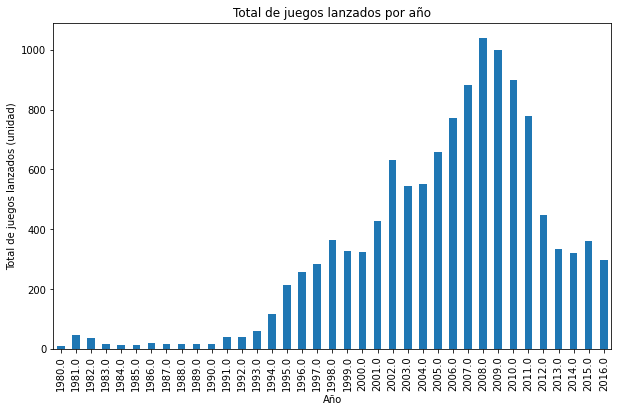

In [18]:
# Obtenemos el total de juegos lanzados en cada año

# Agrupa por año y obtenemos un recuento de nombres de los juegos únicos
total_games_launched = data.groupby(['year_of_release'])['name'].nunique()

# Hacemos la gráfica de barras
total_games_launched.plot(x = 'year_of_release',
y = 'name', kind = 'bar',
title = 'Total de juegos lanzados por año',
xlabel = "Año",
ylabel = "Total de juegos lanzados (unidad)",
figsize = [10, 6])

Nos podemos dar cuenta que el número de juegos lanzados por años empezó de manera constante desde 1980, pero a partir del año de 1900 tuvo un aumento exponencial hasta alcanzar un punto máximo en el 2008. A partir de este punto el número de juegos lanzados empezó a disminuir considerablemente.

Considerando que la tecnología, y por lo tanto los videojuegos, se desarrollan rápidamente y hay muchos cambios en poco tiempo, no todos los años serán relevantes para el análisis.

### Ventas totales por plataforma <a id='total_sales_platforms'></a>

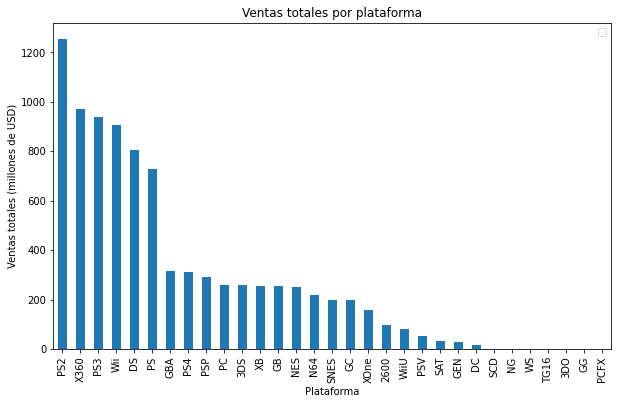

In [19]:
# Variación de las ventas por cada plataforma

# Agrupamos los datos por plataforma
total_sales_per_platform = data.groupby('platform')['total_sales'].sum().reset_index().sort_values(by='total_sales', ascending=False)

# Hacemos la gráfica de barras
total_sales_per_platform.plot(
    x = 'platform',
    y = 'total_sales',
    kind = 'bar',
    title = "Ventas totales por plataforma",
    xlabel = "Plataforma",
    ylabel = "Ventas totales (millones de USD)",
    figsize = [10, 6]
)

# Especificamos las leyendas
plt.legend([])
plt.show()

Podemos observar que las plataformas con las mayores ventas son PS2, Xbox 360, PS3, Wii, DS, y PS, respectivamente. De ahí, el resto de plataformas tienen ventas mucho menores, siendo más de la mitad de las ventas de la plataforma PS.

### Ventas anuales de plataformas con mayores ventas <a id='anual_sales_platforms'></a>

In [20]:
# Obtenemos un nuevo Data Frame con los datos necesarios

# Obtenemos una lista de las plataformas con mayores ventas
max_platforms = ['PS2', 'X360', 'PS3', 'Wii', 'DS', 'PS']

# Agrupamos por plataforma y año de lanzamiento, y obtenemos la suma de las ventas totales
sales_max_platforms = data.groupby(['platform', 'year_of_release'])['total_sales'].sum().reset_index()

#Selecionamos únicamente las plataformas con mayores ventas
sales_max_platforms = sales_max_platforms[sales_max_platforms['platform'].isin(max_platforms)]

# Verificamos nuevo Data Frame
display(sales_max_platforms.sample(4))

,platform,year_of_release,total_sales
121,PS,1995.0,35.96
126,PS,2000.0,96.37
139,PS2,2009.0,26.40
34,DS,2012.0,11.01


In [21]:
# Distribución de ventas por año de las plataformas con mayores ventas

# Creamos una lista de apoyo donde se guardarán todas las variables de ventas
sales_variables = []

# Creamos Data Frame de apoyo
empty_data = {
    'platform': [],
    'year_of_release': [],
    'total_sales': []
}
annual_sales_platforms = pd.DataFrame(empty_data)

# Creamos un Data Frame por cada una de las plataformas
for platform in max_platforms:
    platform_info = sales_max_platforms[sales_max_platforms['platform'] == platform]
    annual_sales_platforms = annual_sales_platforms.merge(platform_info, how='outer', on='year_of_release', suffixes=(None, f'_{platform.lower()}'))
    sales_variables.append(f'total_sales_{platform.lower()}')

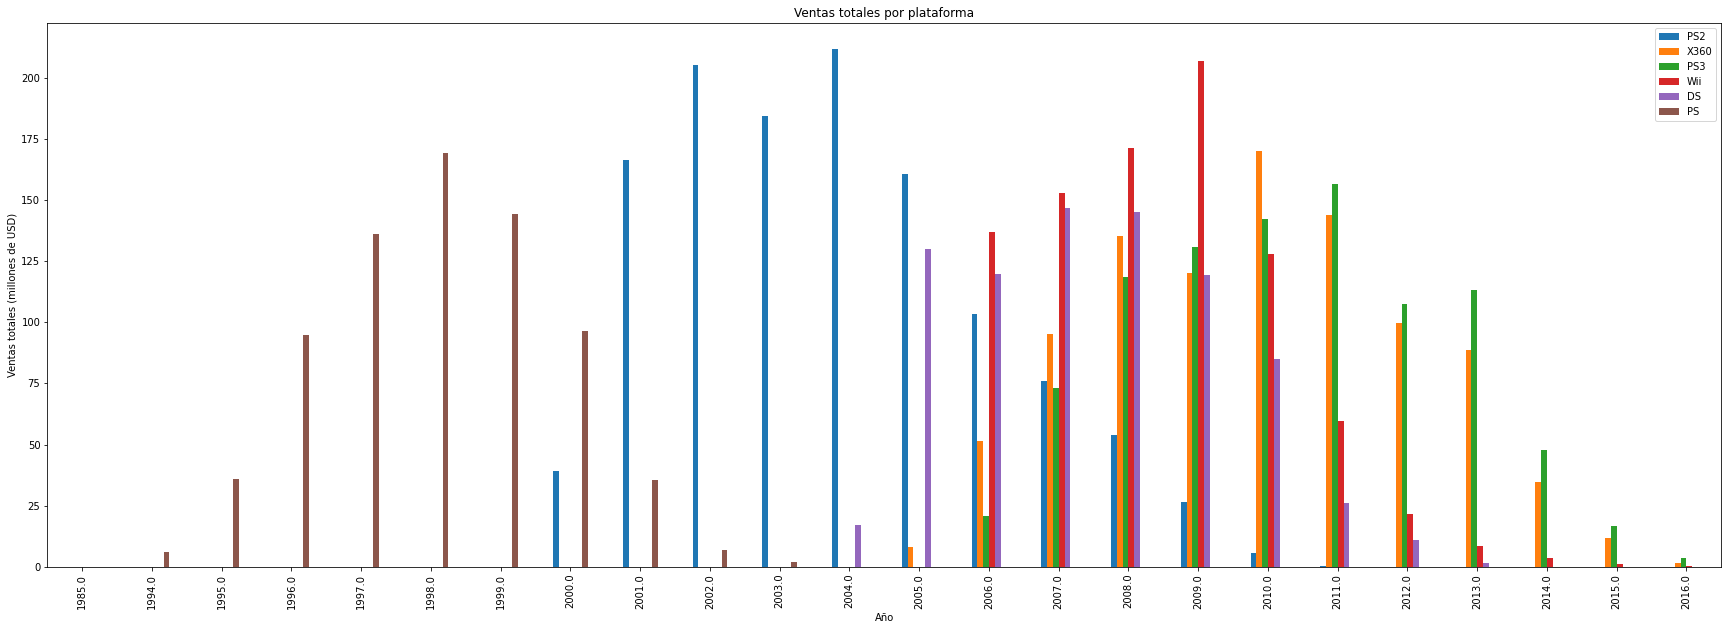

In [22]:
# Hacemos la gráfica de barras
annual_sales_platforms.sort_values(by='year_of_release').plot(
    x = "year_of_release",
    y = sales_variables,
    kind = 'bar',
    title = "Ventas totales por plataforma",
    xlabel = "Año",
    ylabel = "Ventas totales (millones de USD)",
    figsize = [30, 10]
)

# Especificamos las leyendas de planes
plt.legend(max_platforms)
plt.show()

Podemos observar que varias de las plataformas que eran populares ahora ya no existen, como lo son el PlayStation, PlayStation2 y el Nintendo DS. 

Asimismo, podemos observar que cuando una plataforma llega a su máximo en ventas y posteriormente comienzan a bajar las ventas, se tarda aproximadamente un año en que una plataforma nueva aparezca a reemplazarla. Esto se puede deber a los anuncios que hacen las empresas sobre una nueva plataforma, lo que ocasiona que lo usuarios prefieran invertir en una consola nueva y comiencen comprar juegos para dicha consola.

De ahí, las plataformas antiguas se tardan de entre 4 a 5 años en desaparecer después de que las nuevas plataformas comienzan a tener ventas.

### Selección de datos relevantes <a id='relevant_data'></a>

Debido a lo anterior, procederemos a analizar únicamente los datos desde 2011, pues solo así garantizaremos que las plataformas analizadas sean las vigentes, que las preferencias de los usuarios se reflejen correctamente (considerando que las preferencias de los usuarios cambian con el tiempo), y podremos analizar la caída de las ventas en los videojuegos.

El tomar esta decisión también se ve respaldada porque la teconología, como lo son los videojuegos, experimenta cambios sustanciales en periodos de tiempo muy cortos. Por lo que también conviene no tomar un periodo de tiempo extenso.

In [23]:
# Obtenemos únicamente los datos relevantes para el análisis
relevant_data = data[data['year_of_release'] >= 2011]

# Verificamos nuevo DataFrame
print(relevant_data.sample(3))

                                        name platform  year_of_release  \
6994                                  XCOM 2       PC           2016.0   
8811                            Tokyo Xanadu      PSV           2015.0   
7952  Earth Defense Force: Insect Armageddon     X360           2011.0   

             genre  na_sales  eu_sales  jp_sales  other_sales  critic_score  \
6994      Strategy      0.09      0.12      0.00         0.02          88.0   
8811  Role-Playing      0.00      0.00      0.15         0.00           NaN   
7952       Shooter      0.10      0.04      0.03         0.01          68.0   

      user_score rating  total_sales  
6994         7.1      T         0.23  
8811         NaN    NaN         0.15  
7952         8.2      T         0.18  


### Plataformas líderes en ventas <a id='leader_sales_platforms'></a>

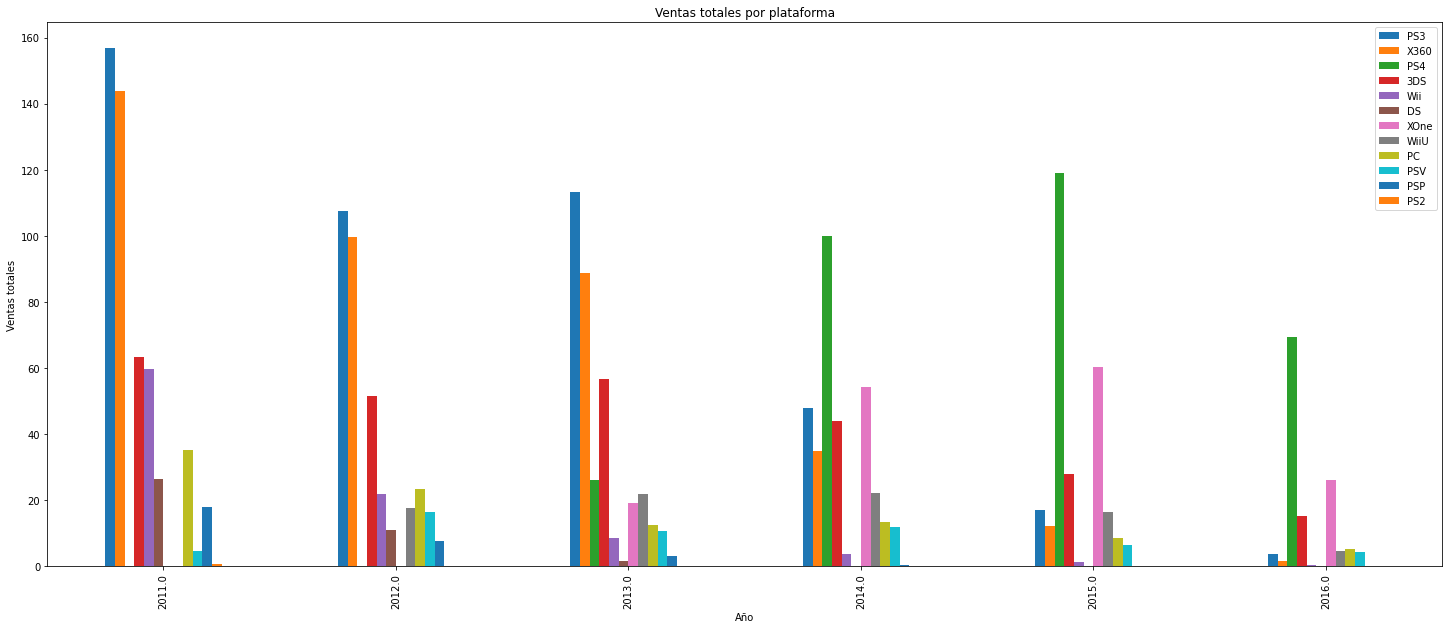

In [24]:
# Obtenemos una lista de todas las plataformas
all_platforms = relevant_data['platform'].unique()

# Agrupa por plataforma y año y calcula el total de ventas
total_sales = relevant_data.groupby(['platform', 'year_of_release'])['total_sales'].sum().reset_index()

# Creamos una lista de apoyo donde se todas las variables de ventas
sales_variables = []

# Creamos Data Frame de apoyo
empty_data = {
    'platform': [],
    'year_of_release': [],
    'total_sales': []
}
total_sales_platforms = pd.DataFrame(empty_data)

# Creamos un Data Frame por cada una de las plataformas
for platform in all_platforms:
    platform_info = total_sales[total_sales['platform'] == platform]
    total_sales_platforms = total_sales_platforms.merge(platform_info, how='outer', on="year_of_release", suffixes=(None, f'_{platform.lower()}'))
    sales_variables.append(f'total_sales_{platform.lower()}')

# Hacemos la gráfica de barras
total_sales_platforms.plot(
    x = "year_of_release",
    y = sales_variables,
    kind = 'bar',
    title = "Ventas totales por plataforma",
    xlabel = "Año",
    ylabel = "Ventas totales",
    figsize = [25, 10]
)

# Especificamos las leyendas de planes
plt.legend(all_platforms)
plt.show()

Para el 2016 las plataformas líderes en ventas eran PS4, Xbox One y Nintendo 3DS, respectivamente. Además, cabe destacar que se observa una aparente reducción en las ventas para todas las con forme nos acercamos al año 2016. 

No obstante, si se tuviera que elegir plataformas potencialmente rentables, estas podrían ser PS4 y Xbox One, pues para el año 2016 pudieron tener una caída en ventas, pero esta podría no afectar las ventas del año 2017.

### Diagrama de caja de ventas globales <a id='global_sales'></a>

/opt/conda/lib/python3.9/site-packages/seaborn/_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


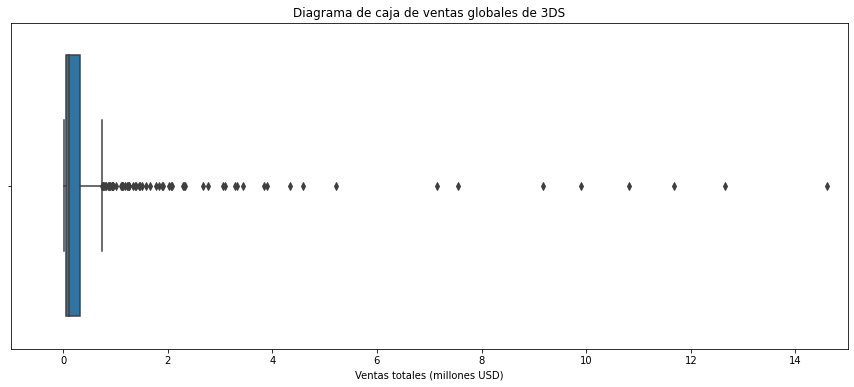

count    520.000000
mean       0.498077
std        1.430876
min        0.010000
25%        0.050000
50%        0.120000
75%        0.330000
max       14.600000
Name: total_sales, dtype: float64

/opt/conda/lib/python3.9/site-packages/seaborn/_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


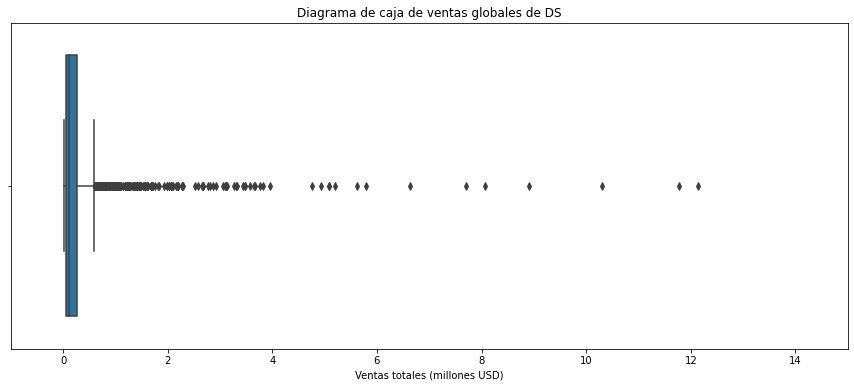

count    2151.000000
mean        0.374765
std         1.426451
min         0.010000
25%         0.050000
50%         0.110000
75%         0.270000
max        29.800000
Name: total_sales, dtype: float64

/opt/conda/lib/python3.9/site-packages/seaborn/_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


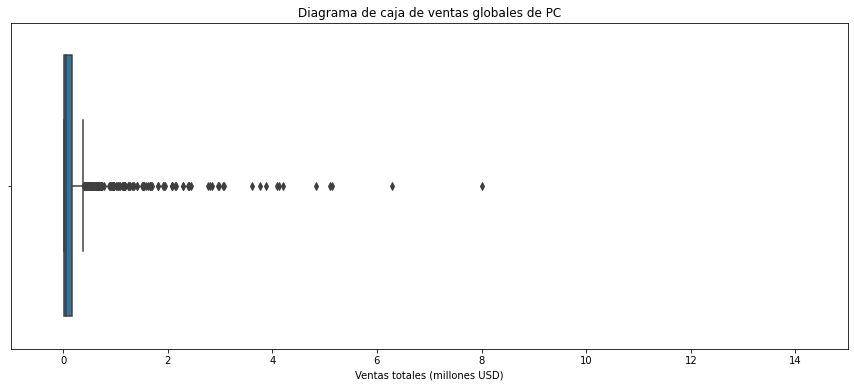

count    974.000000
mean       0.266448
std        0.675577
min        0.010000
25%        0.020000
50%        0.050000
75%        0.170000
max        8.010000
Name: total_sales, dtype: float64

/opt/conda/lib/python3.9/site-packages/seaborn/_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


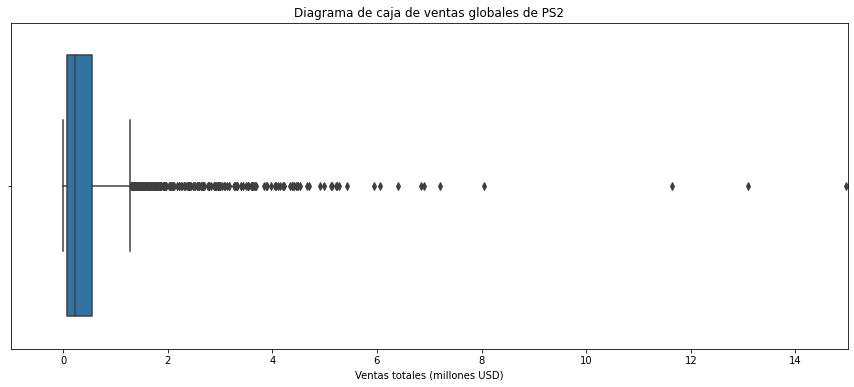

count    2161.000000
mean        0.581106
std         1.137927
min         0.000000
25%         0.080000
50%         0.230000
75%         0.560000
max        20.810000
Name: total_sales, dtype: float64

/opt/conda/lib/python3.9/site-packages/seaborn/_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


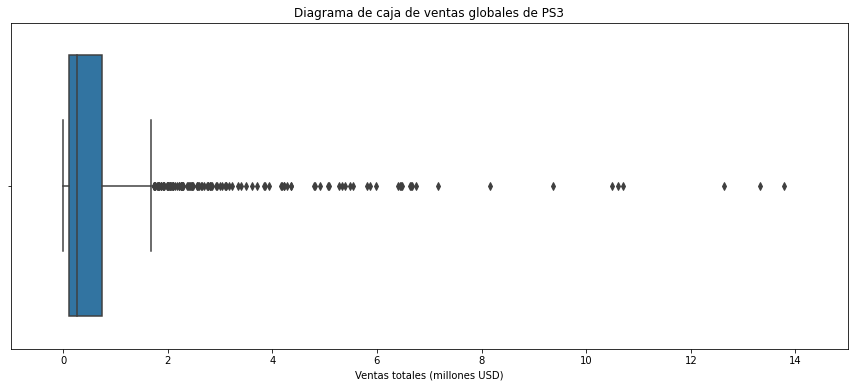

count    1331.000000
mean        0.705973
std         1.391749
min         0.000000
25%         0.110000
50%         0.270000
75%         0.750000
max        21.050000
Name: total_sales, dtype: float64

/opt/conda/lib/python3.9/site-packages/seaborn/_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


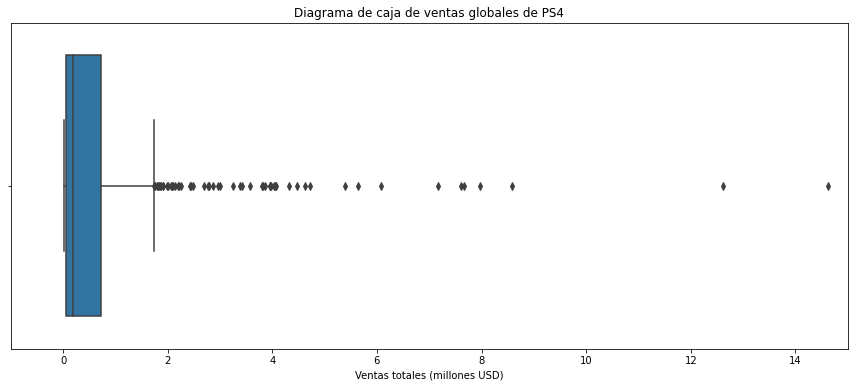

count    392.000000
mean       0.801378
std        1.609456
min        0.010000
25%        0.060000
50%        0.200000
75%        0.730000
max       14.630000
Name: total_sales, dtype: float64

/opt/conda/lib/python3.9/site-packages/seaborn/_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


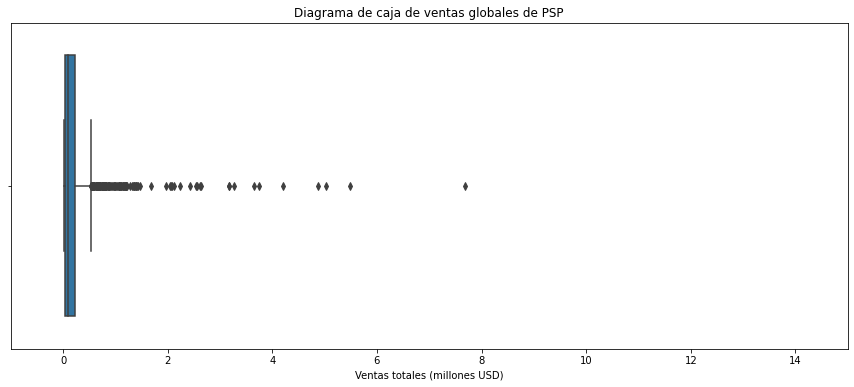

count    1209.000000
mean        0.243218
std         0.520210
min         0.010000
25%         0.030000
50%         0.090000
75%         0.230000
max         7.680000
Name: total_sales, dtype: float64

/opt/conda/lib/python3.9/site-packages/seaborn/_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


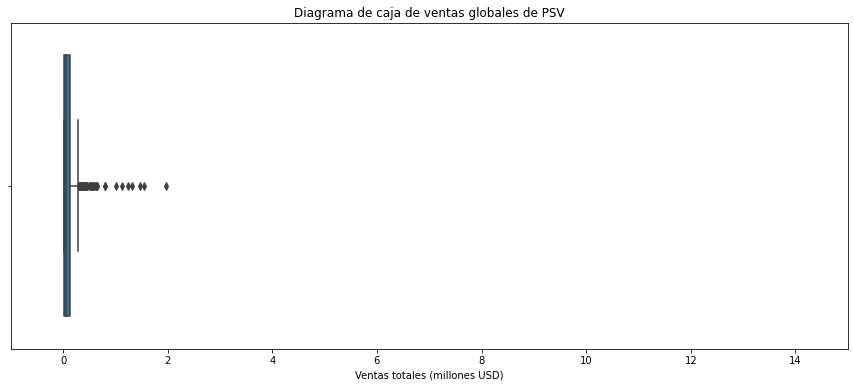

count    430.000000
mean       0.125744
std        0.212193
min        0.010000
25%        0.020000
50%        0.055000
75%        0.130000
max        1.960000
Name: total_sales, dtype: float64

/opt/conda/lib/python3.9/site-packages/seaborn/_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


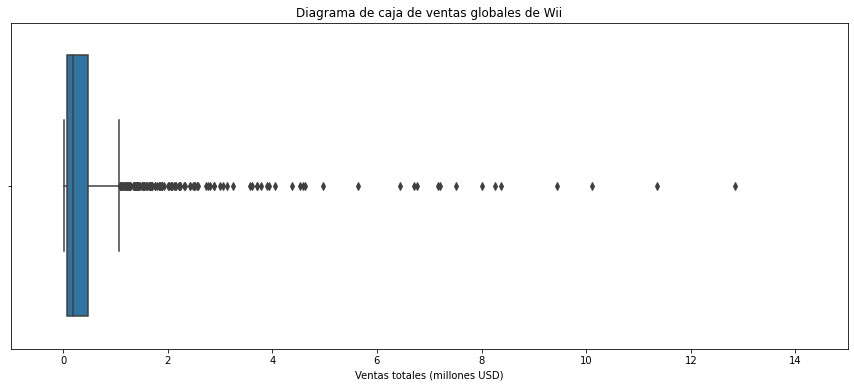

count    1320.000000
mean        0.687508
std         3.126609
min         0.010000
25%         0.080000
50%         0.190000
75%         0.482500
max        82.540000
Name: total_sales, dtype: float64

/opt/conda/lib/python3.9/site-packages/seaborn/_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


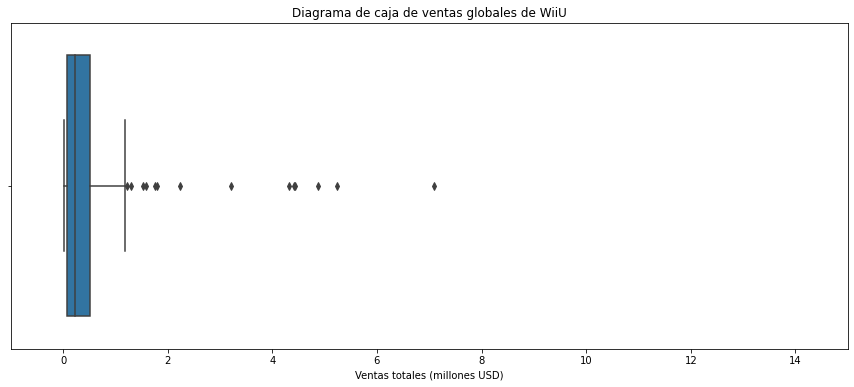

count    147.000000
mean       0.559116
std        1.058836
min        0.010000
25%        0.080000
50%        0.220000
75%        0.525000
max        7.090000
Name: total_sales, dtype: float64

/opt/conda/lib/python3.9/site-packages/seaborn/_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


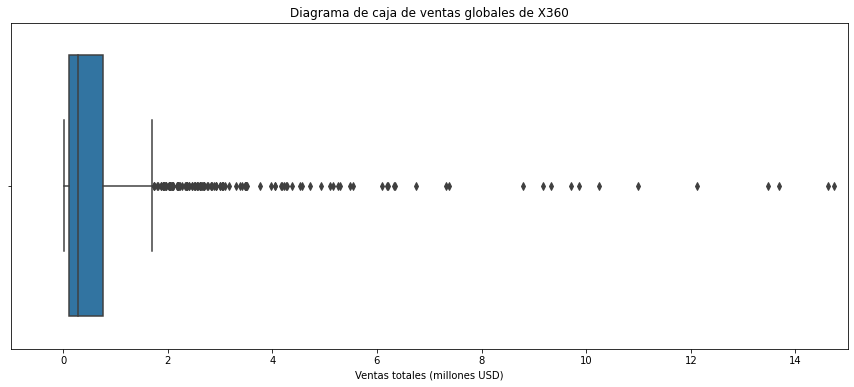

count    1262.000000
mean        0.769746
std         1.615674
min         0.010000
25%         0.110000
50%         0.280000
75%         0.757500
max        21.820000
Name: total_sales, dtype: float64

/opt/conda/lib/python3.9/site-packages/seaborn/_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


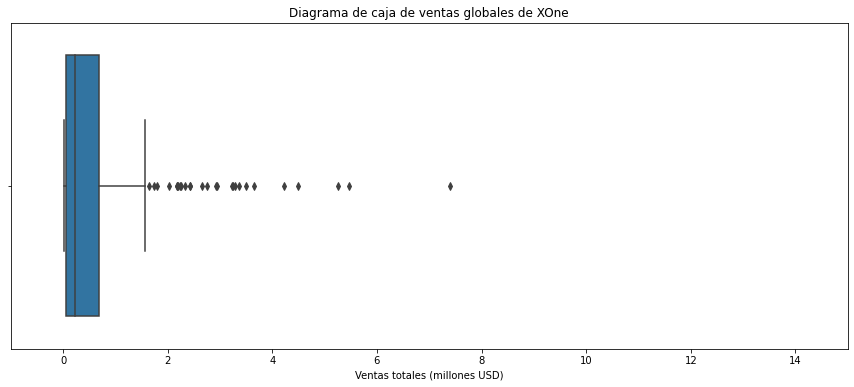

count    247.000000
mean       0.645020
std        1.036139
min        0.010000
25%        0.060000
50%        0.220000
75%        0.685000
max        7.390000
Name: total_sales, dtype: float64

In [25]:
# Obtenemos Data Frame de las ventas globales
global_sales = data[['platform', 'total_sales']]

# Ordenamos por orden alfabético las plataformas
all_platforms.sort()

# Iteramos por todas las plataformas estudiadas
for platform in all_platforms:
    # Obtenemos los datos para la plataforma
    box_data = global_sales[global_sales['platform'] == platform]
    
    # Graficamos diagrama de caja
    plt.figure(figsize = (15, 6))
    sns.boxplot(box_data['total_sales'])
    plt.title(f'Diagrama de caja de ventas globales de {platform}')
    plt.xlabel("Ventas totales (millones USD)")
    plt.xlim(-1, 15)
    plt.show()

    # Imprimimos estadística descriptiva
    display(box_data['total_sales'].describe())

A simple vista, parece ser que sí hay diferencias significativas entre las plataformas que registraron mayores ventas a las que tuvieron las menores. Tomando por ejemplo el PSV, el 75% de sus ventas representan poco menos del 50% de las ventas del PS3.

Asimismo, observamos en todos los diagramas una gran dispersión de los datos, por lo que el promedio de las ventas difiere en gran cantidad de la mediana de los datos. Por lo mismo, se considera que una mejor medida de tendencia central será la mediana.

### Correlación entre reseñas y ventas <a id='corr_reviews_sales'></a>

In [26]:
# Obtenemos Data Frame con los datos necesarios
cor_data = relevant_data[relevant_data['platform'] == 'PS4'][['name', 'platform', 'total_sales', 'critic_score', 'user_score']]

display(cor_data.head())

,name,platform,total_sales,critic_score,user_score
31,Call of Duty: Black Ops 3,PS4,14.63,NaN,NaN
42,Grand Theft Auto V,PS4,12.62,97.0,8.3
77,FIFA 16,PS4,8.58,82.0,4.3
87,Star Wars Battlefront (2015),PS4,7.98,NaN,NaN
92,Call of Duty: Advanced Warfare,PS4,7.66,83.0,5.7


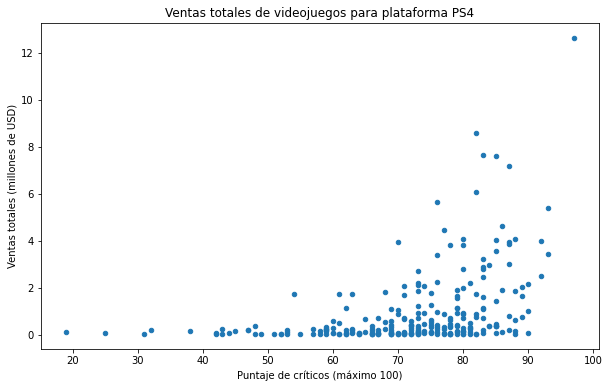

Coeficiente de correlación: 0.40656790206178095


In [27]:
# Gráfico de dispersión de reseñas de críticos
cor_data.plot(
    x = "critic_score",
    y = "total_sales",
    kind = "scatter",
    title = "Ventas totales de videojuegos para plataforma PS4",
    figsize = [10, 6],
    xlabel = "Puntaje de críticos (máximo 100)", 
    ylabel = "Ventas totales (millones de USD)"
)

plt.show()

# Imprimimos el coeficiente de correlación
cor_critic_score = cor_data['critic_score'].corr(cor_data['total_sales'])
print(f'Coeficiente de correlación: {cor_critic_score}')

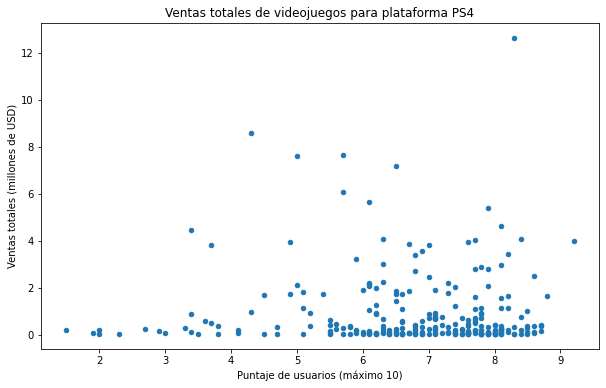

Coeficiente de correlación: -0.031957110204556424


In [28]:
# Gráfico de dispersión de reseñas de usuarios
cor_data.plot(
    x = "user_score",
    y = "total_sales",
    kind = "scatter",
    title = "Ventas totales de videojuegos para plataforma PS4",
    figsize = [10, 6],
    xlabel = "Puntaje de usuarios (máximo 10)", 
    ylabel = "Ventas totales (millones de USD)"
)

plt.show()

# Imprimimos el coeficiente de correlación
cor_user_score = cor_data['user_score'].corr(cor_data['total_sales'])
print(f'Coeficiente de correlación: {cor_user_score}')

Lo que nos muestran estos datos es que hay una correlación positiva mediana entre la puntuación de los críticos y las ventas de videojuegos. Esto podría significar que los usuarios toman en cuenta parcialmente las puntuaciones de los críticos para comprar o no un videojuego. 

Mientras que observamos una correlación casi nula entre la puntuación de los usuarios y las ventas de videojuegos. Esto significaría que los usuarios no consideran la puntuación de otros usuarios para comprar videojuegos.

### Comparación de ventas de los mismos juegos en otras plataformas <a id='comparison_sales_games'></a>

Dado que son muchos videojuegos, tomaremos una muestra de 6 videojuegos para analizar.

In [29]:
# Obtenemos muestra de 4 videojuegos

# Creamos lista con los nombres de los videojuegos
games = ["The LEGO Movie Videogame", "Grand Theft Auto V", "The Elder Scrolls V: Skyrim", "Call of Duty: Ghosts"]

In [30]:
# Obtenemos DataFrame con los datos de los videojuegos a analizar
games_data = relevant_data[relevant_data['name'].isin(games)].reset_index(drop=True)

display(games_data.head())

,name,platform,year_of_release,genre,na_sales,eu_sales,jp_sales,other_sales,critic_score,user_score,rating,total_sales
0,Grand Theft Auto V,PS3,2013.0,Action,7.02,9.09,0.98,3.96,97.0,8.2,M,21.05
1,Grand Theft Auto V,X360,2013.0,Action,9.66,5.14,0.06,1.41,97.0,8.1,M,16.27
2,Grand Theft Auto V,PS4,2014.0,Action,3.96,6.31,0.38,1.97,97.0,8.3,M,12.62
3,Call of Duty: Ghosts,X360,2013.0,Shooter,6.73,2.56,0.04,0.91,73.0,2.6,M,10.24
4,Call of Duty: Ghosts,PS3,2013.0,Shooter,4.10,3.63,0.38,1.25,71.0,2.6,M,9.36


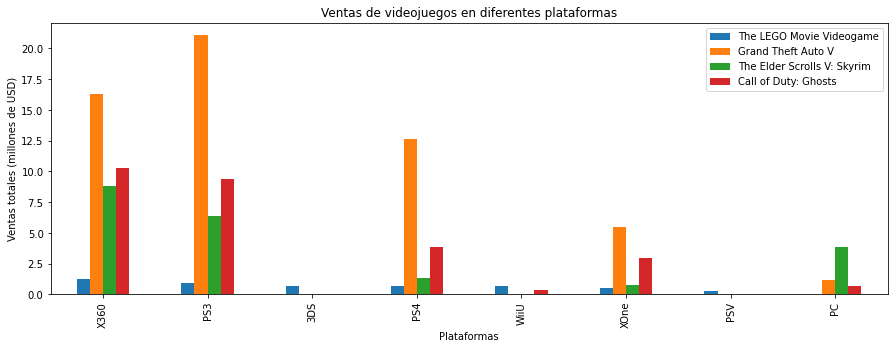

In [31]:
# Creamos una lista de apoyo donde se todas las variables de ventas
sales_games_var = []

# Creamos Data Frame de apoyo
empty_data = {
    'platform': [],
    'year_of_release': [],
    'total_sales': []
}
games_platforms_sales = pd.DataFrame(empty_data)

# Creamos un Data Frame por cada uno de los videojuegos
for game in games:
    game_info = games_data[games_data['name'] == game]
    games_platforms_sales = games_platforms_sales.merge(game_info, how='outer', on="platform", suffixes=(None, f'_{game.replace(" ","").lower()}'))
    sales_games_var.append(f'total_sales_{game.replace(" ","").lower()}')
    
# Hacemos la gráfica de barras
games_platforms_sales.plot(
    x = "platform",
    y = sales_games_var,
    kind = 'bar',
    title = "Ventas de videojuegos en diferentes plataformas",
    xlabel = "Plataformas",
    ylabel = "Ventas totales (millones de USD)",
    figsize = [15, 5]
)

# Especificamos las leyendas de planes
plt.legend(games)
plt.show()

Podemos observar que hay plataformas donde cierto juego tiene mayores ventas; tal como es el caso de Grand Theft Auto V que registró mayores ventas en la plataforma PS3. Asimismo, nos encontramos también con videojuegos donde la recepción fue similar en todas las plataformas, tal como es el caso del juego The Lego Movie Videogame.

Esto nos podría indicar que la plataforma también tiene influencia sobre ciertos videojuegos, o bien, que algunos videojuegos son preferidos por los usuarios de ciertas plataformas.

### Distribución general de juegos por género <a id='genre_games'></a>

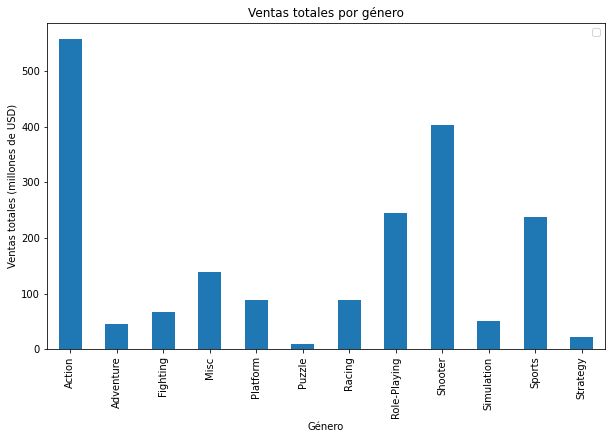

In [32]:
# Obtenemos una lista de todas las plataformas
all_platforms = relevant_data['platform'].unique()

# Agrupa por género y obtiene las ventas totales
genre_data = relevant_data.groupby('genre')['total_sales'].sum().reset_index()

# Hacemos la gráfica de barras
genre_data.plot(
    x = "genre",
    y = "total_sales",
    kind = "bar",
    title = "Ventas totales por género",
    xlabel = "Género",
    ylabel = "Ventas totales (millones de USD)",
    figsize = [10, 6]
)

# Especificamos las leyendas de planes
plt.legend([])
plt.show()

Podemos observar que los géneros con mayores ventas son aquellos que pertenecen al género de acción, disparos, juegos de rol y deportes. Mientras que los géneros con menores ventas son los de rompecabezas y estrategia. 

Por lo que podríamos decir que los usuarios prefieren juegos donde puedan tener aventuras y explorar diferentes mundos, pero no aquellos en los que tengan que pensar de manera intensa.

## 4. Perfil de usuario para cada región <a id='user_profiles'></a>

### Perfil de Norteamérica <a id='na_profile'></a>

#### Plataformas principales <a id='na_platforms'></a>

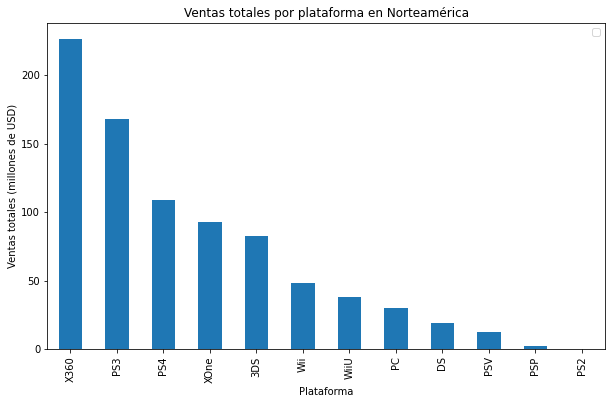

In [33]:
# Obtenemos DataFrame con los datos necesarios
na_sales_per_platform = relevant_data.groupby('platform')[['na_sales', 'total_sales']].sum().reset_index().sort_values(by='na_sales', ascending=False)

# Hacemos gráfica de barras
na_sales_per_platform.plot(x = 'platform',
                           y = 'na_sales',
                           kind = 'bar',
                           title = 'Ventas totales por plataforma en Norteamérica',
                           xlabel = "Plataforma",
                           ylabel = "Ventas totales (millones de USD)",
                           figsize = [10, 6])

# Especificamos las leyendas
plt.legend([])

Observamos que las cinco plataformas principales en Norteamérica son Xbox 360, PlayStation 3, PlayStation 4, Xbox One y Nintendo 3DS.

#### Cuotas de mercado <a id='na_market_share'></a>

In [34]:
# Obtenemos los datos de las principales plataformas
na_market_data = na_sales_per_platform.head(5).reset_index(drop=True)

# Obtenemos el market share
na_market_data['na_market_share'] = na_market_data['na_sales'] / na_market_data['total_sales']

# Imprimimos cambios
display(na_market_data)

,platform,na_sales,total_sales,na_market_share
0,X360,226.80,380.38,0.596246
1,PS3,168.26,445.57,0.377629
2,PS4,108.74,314.14,0.346151
3,XOne,93.12,159.32,0.584484
4,3DS,82.65,257.81,0.320585


Podemos observar que Norteamérica es responsable de casi el 60% de las ventas totales de los videojuegos para Xbox 360, así como de casi el 59% de ventas para la plataforma Xbox One. Por lo que podemos pensar que los usuarios de Norteamérica prefieren las plataformas de Xbox. 

#### Géneros principales <a id='na_genres'></a>

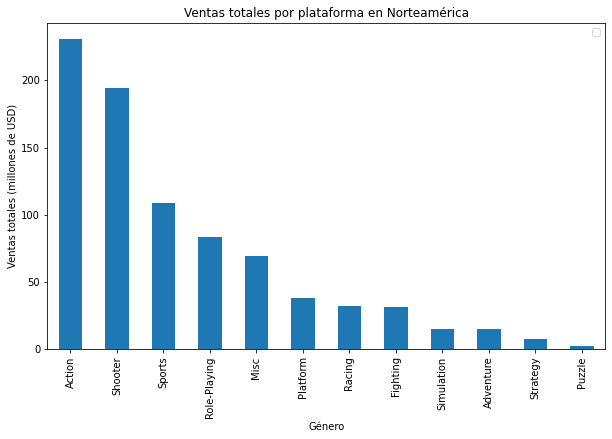

In [35]:
# Obtenemos DataFrame con los datos necesarios
na_sales_per_genres = relevant_data.groupby('genre')['na_sales'].sum().reset_index().sort_values(by='na_sales', ascending=False)

# Hacemos gráfica de barras
na_sales_per_genres.plot(x = 'genre',
                         y = 'na_sales',
                         kind = 'bar',
                         title = 'Ventas totales por plataforma en Norteamérica',
                         xlabel = "Género",
                         ylabel = "Ventas totales (millones de USD)",
                         figsize = [10, 6])

# Especificamos las leyendas
plt.legend([])

Los principales géneros para los usuarios de Norteamérica son acción, disparos, deportes, juegos de rol y otros.

#### Efecto de las clasificaciones ESRB en las ventas regionales <a id='na_esrb'></a>

/opt/conda/lib/python3.9/site-packages/seaborn/_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


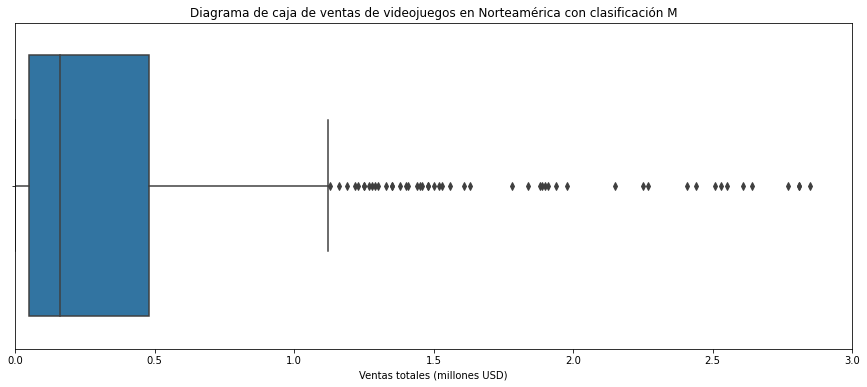

/opt/conda/lib/python3.9/site-packages/seaborn/_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


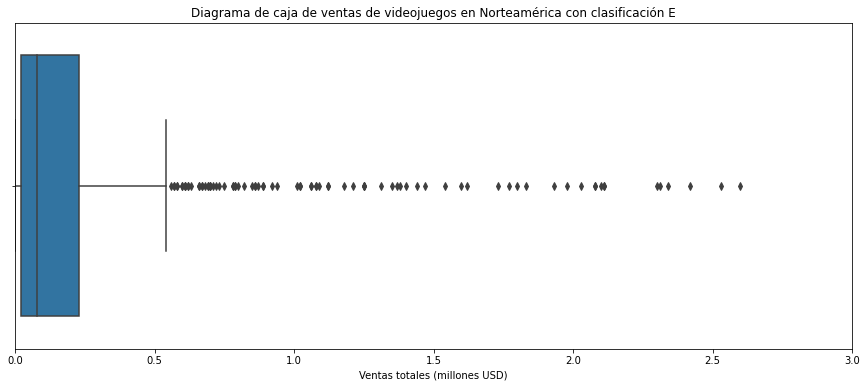

/opt/conda/lib/python3.9/site-packages/seaborn/_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


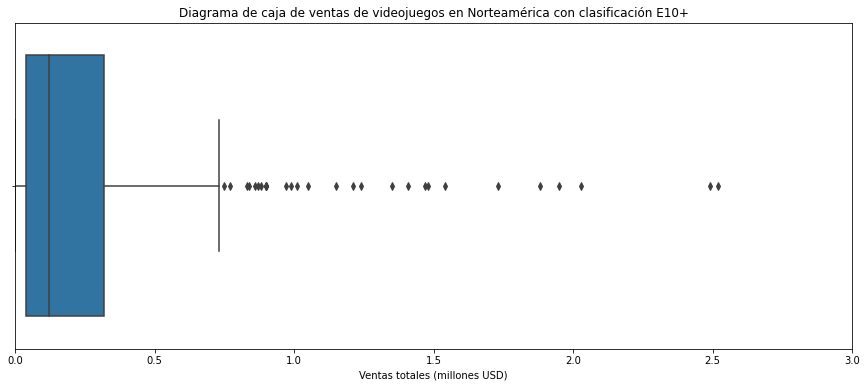

/opt/conda/lib/python3.9/site-packages/seaborn/_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


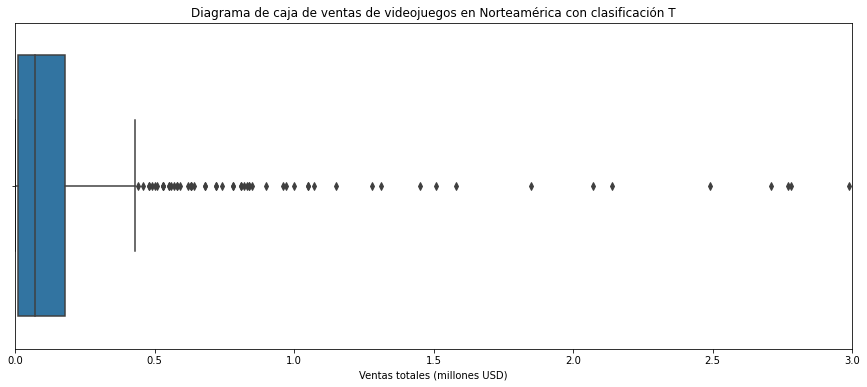

/opt/conda/lib/python3.9/site-packages/seaborn/_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


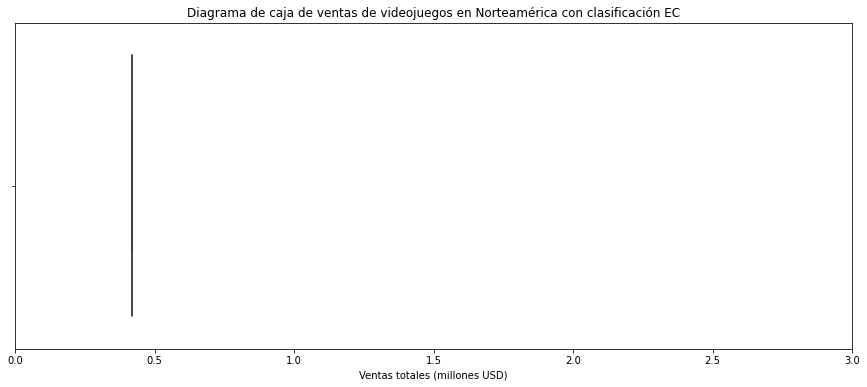

/opt/conda/lib/python3.9/site-packages/seaborn/_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


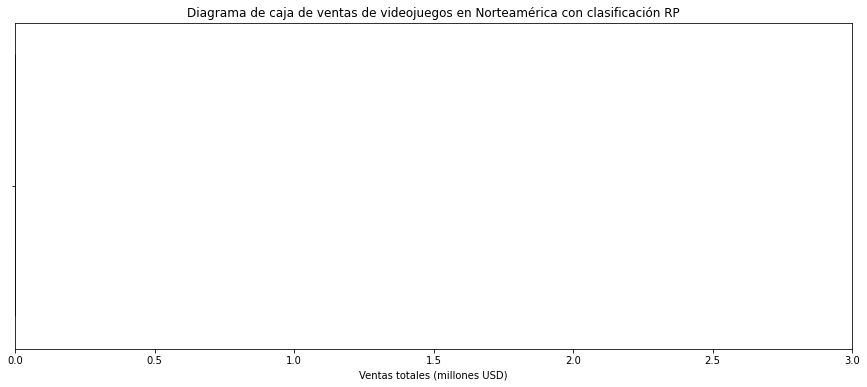

In [36]:
# Creamos data frame con datos necesarios
esrb_data = relevant_data[['rating','na_sales', 'eu_sales', 'jp_sales']].dropna().reset_index(drop=True)

# Obtenemos lista de los posibles ratings
ratings = esrb_data['rating'].unique()

for rating in ratings:
    # Obtenemos los datos del rating
    data_rating = esrb_data[esrb_data['rating'] == rating]
    
    # Graficamos diagrama de caja
    plt.figure(figsize = (15, 6))
    sns.boxplot(data_rating['na_sales'])
    plt.title(f'Diagrama de caja de ventas de videojuegos en Norteamérica con clasificación {rating}')
    plt.xlabel("Ventas totales (millones USD)")
    plt.xlim(0, 3)
    plt.show()

Observamos que los juegos con clasificación M tienden a tener mayores ventas que el resto de clasificaciones. De ahí le sigue la clasificación E10+ y la clasificación E.

### Perfil de Europa <a id='eu_profile'></a>

#### Plataformas principales <a id='eu_platforms'></a>

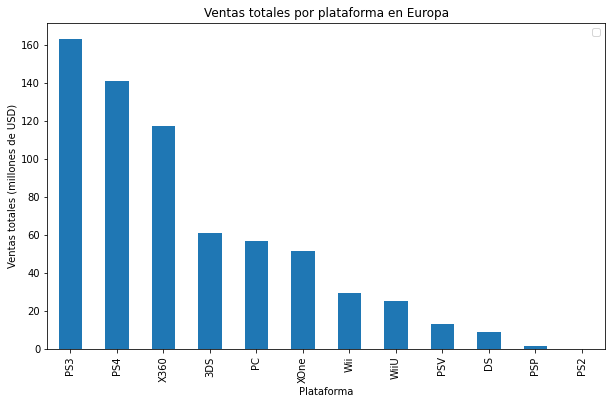

In [37]:
# Plataformas principales

# Obtenemos DataFrame con los datos necesarios
eu_sales_per_platform = relevant_data.groupby('platform')[['eu_sales', 'total_sales']].sum().reset_index().sort_values(by='eu_sales', ascending=False)

# Hacemos gráfica de barras
eu_sales_per_platform.plot(x = 'platform',
                           y = 'eu_sales',
                           kind = 'bar',
                           title = 'Ventas totales por plataforma en Europa',
                           xlabel = "Plataforma",
                           ylabel = "Ventas totales (millones de USD)",
                           figsize = [10, 6])

# Especificamos las leyendas
plt.legend([])

Observamos que las cinco plataformas principales en Europa son PlayStation 3, PlayStation 4, Xbox 360, Nintendo 3DS, y PC. 

#### Cuotas de mercado <a id='eu_market_share'></a>

In [38]:
# Obtenemos los datos de las principales plataformas
eu_market_data = eu_sales_per_platform.head(5).reset_index(drop=True)

# Obtenemos el market share
eu_market_data['eu_market_share'] = eu_market_data['eu_sales'] / eu_market_data['total_sales']

# Imprimimos cambios
display(eu_market_data)

,platform,eu_sales,total_sales,eu_market_share
0,PS3,163.10,445.57,0.366048
1,PS4,141.09,314.14,0.449131
2,X360,117.10,380.38,0.307850
3,3DS,61.27,257.81,0.237656
4,PC,56.70,97.68,0.580467


Podemos observar que los usuarios de Europa prefieren jugar en PC, pues son responsables de casi el 60% de las ventas en dicha plataforma. La segunda plataforma de elección por parte de estos usuarios en el PlayStation 4, pues ellos son responsables de casi el 45% de las ventas en esta plataforma.

#### Géneros principales <a id='eu_genres'></a>

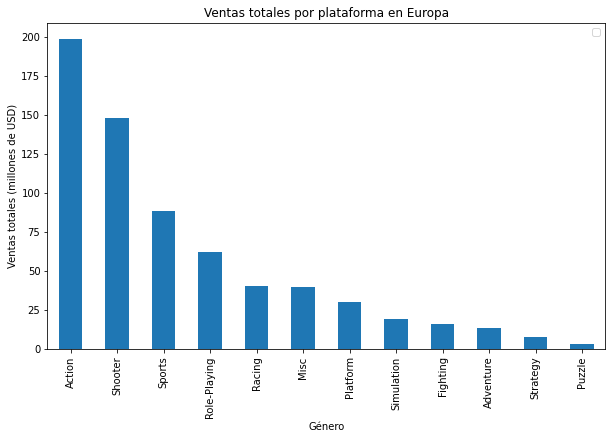

In [39]:
# Obtenemos DataFrame con los datos necesarios
eu_sales_per_genres = relevant_data.groupby('genre')['eu_sales'].sum().reset_index().sort_values(by='eu_sales', ascending=False)

# Hacemos gráfica de barras
eu_sales_per_genres.plot(x = 'genre',
                         y = 'eu_sales',
                         kind = 'bar',
                         title = 'Ventas totales por plataforma en Europa',
                         xlabel = "Género",
                         ylabel = "Ventas totales (millones de USD)",
                         figsize = [10, 6])

# Especificamos las leyendas
plt.legend([])

Podemos ver que los principales géneros que prefieren los usuarios de Europa son de acción, disparos, deportes, juegos de rol y carreras.

#### Efecto de las clasificaciones ESRB en las ventas regionales <a id='eu_esrb'></a>

/opt/conda/lib/python3.9/site-packages/seaborn/_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


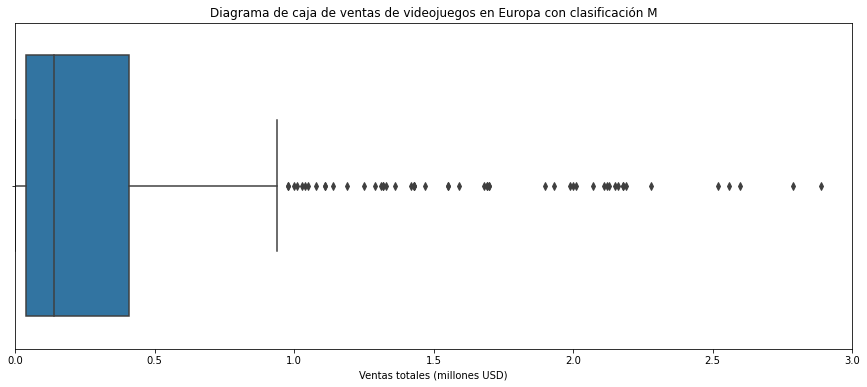

/opt/conda/lib/python3.9/site-packages/seaborn/_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


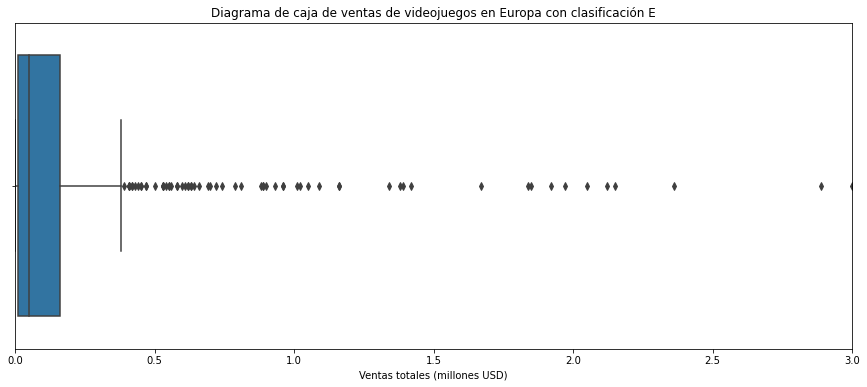

/opt/conda/lib/python3.9/site-packages/seaborn/_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


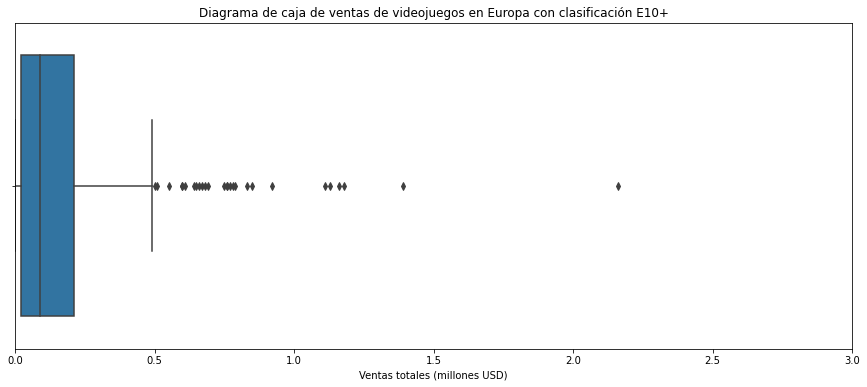

/opt/conda/lib/python3.9/site-packages/seaborn/_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


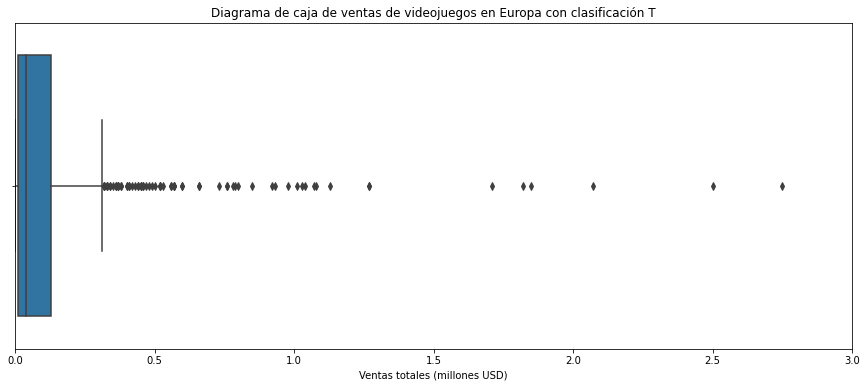

/opt/conda/lib/python3.9/site-packages/seaborn/_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


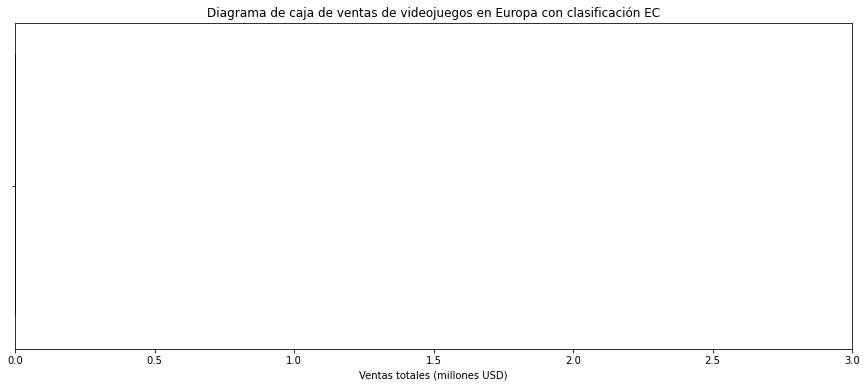

/opt/conda/lib/python3.9/site-packages/seaborn/_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


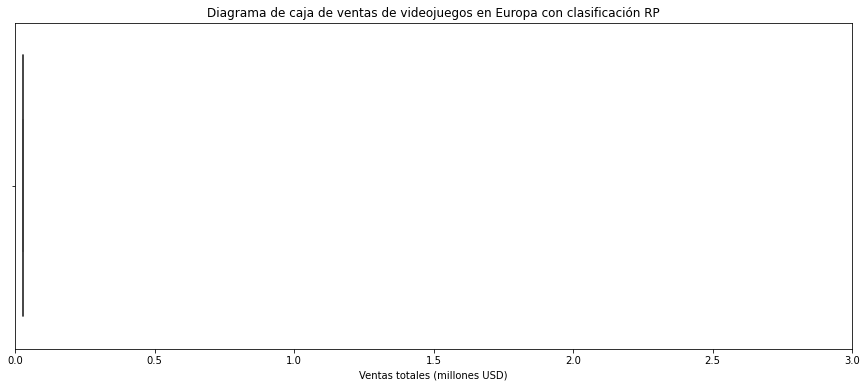

In [40]:
# Obtenemos diagramas de caja de ventas de todos los ratings
for rating in ratings:
    # Obtenemos los datos del rating
    data_rating = esrb_data[esrb_data['rating'] == rating]
    
    # Graficamos diagrama de caja
    plt.figure(figsize = (15, 6))
    sns.boxplot(data_rating['eu_sales'])
    plt.title(f'Diagrama de caja de ventas de videojuegos en Europa con clasificación {rating}')
    plt.xlabel("Ventas totales (millones USD)")
    plt.xlim(0, 3)
    plt.show()

Observamos que las ventas de videojuegos con clasificación M tienden a ser mayores que el resto. De ahí le siguen los juegos con clasificación E10+, E y T.

### Perfil de Japón <a id='jp_profile'></a>

#### Plataformas principales <a id='jp_platforms'></a>

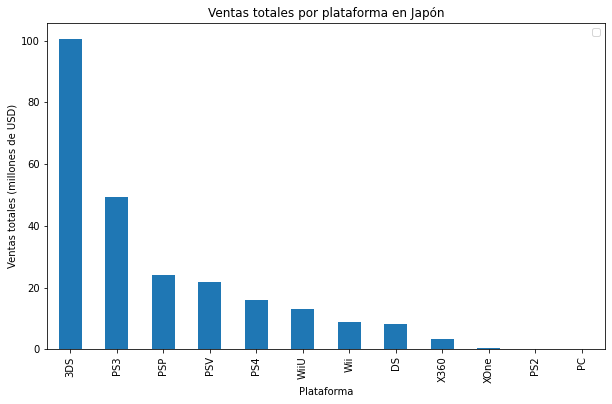

In [41]:
# Plataformas principales

# Obtenemos DataFrame con los datos necesarios
jp_sales_per_platform = relevant_data.groupby('platform')[['jp_sales', 'total_sales']].sum().reset_index().sort_values(by='jp_sales', ascending=False)

# Hacemos gráfica de barras
jp_sales_per_platform.plot(x = 'platform',
                           y = 'jp_sales',
                           kind = 'bar',
                           title = 'Ventas totales por plataforma en Japón',
                           xlabel = "Plataforma",
                           ylabel = "Ventas totales (millones de USD)",
                           figsize = [10, 6])

# Especificamos las leyendas
plt.legend([])

Observamos que las cinco plataformas principales en Japón son Nintendo 3DS, PlayStation 3, PSP, PlayStation Vita, y PlayStation 4. 

#### Cuotas de mercado <a id='jp_market_share'></a>

In [42]:
# Obtenemos los datos de las principales plataformas
jp_market_data = jp_sales_per_platform.head(5).reset_index(drop=True)

# Obtenemos el market share
jp_market_data['jp_market_share'] = jp_market_data['jp_sales'] / jp_market_data['total_sales']

# Imprimimos cambios
display(jp_market_data)

,platform,jp_sales,total_sales,jp_market_share
0,3DS,100.62,257.81,0.390287
1,PS3,49.39,445.57,0.110847
2,PSP,24.04,29.01,0.828680
3,PSV,21.84,53.81,0.405873
4,PS4,15.96,314.14,0.050805


Por su parte, observamos que la mayoría de los usuarios japoneses prefieren el PlayStation Portable (PSP), pues son responsables del 83% de las ventas de videojuegos para esta plataforma. De ahí, prefieren casi por igual jugar videojuegos en las plataformas de Nintendo 3DS y PlayStation Vita.

#### Géneros principales <a id='jp_genres'></a>

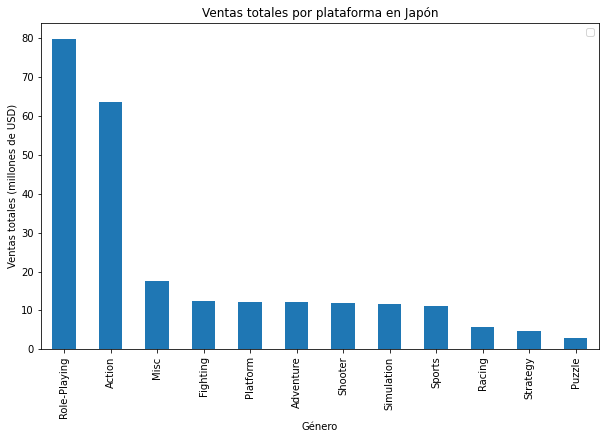

In [43]:
# Obtenemos DataFrame con los datos necesarios
jp_sales_per_genres = relevant_data.groupby('genre')['jp_sales'].sum().reset_index().sort_values(by='jp_sales', ascending=False)

# Hacemos gráfica de barras
jp_sales_per_genres.plot(x = 'genre',
                         y = 'jp_sales',
                         kind = 'bar',
                         title = 'Ventas totales por plataforma en Japón',
                         xlabel = "Género",
                         ylabel = "Ventas totales (millones de USD)",
                         figsize = [10, 6])

# Especificamos las leyendas
plt.legend([])

Podemos observar que los usuarios de Japón prefieren en su mayoría los juegos de rol, seguido de los juegos de acción. De ahí sus preferencias son por Misc, peleas, y Platform.

#### Efecto de las clasificaciones ESRB en las ventas regionales <a id='jp_esrb'></a>

/opt/conda/lib/python3.9/site-packages/seaborn/_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


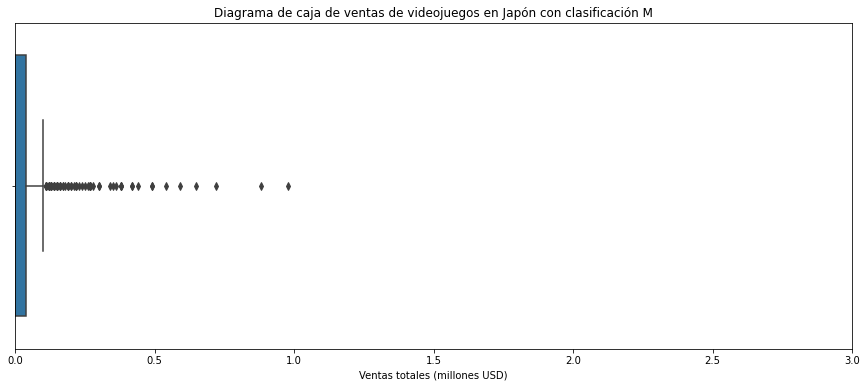

count    622.000000
mean       0.042026
std        0.100874
min        0.000000
25%        0.000000
50%        0.000000
75%        0.040000
max        0.980000
Name: jp_sales, dtype: float64

/opt/conda/lib/python3.9/site-packages/seaborn/_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


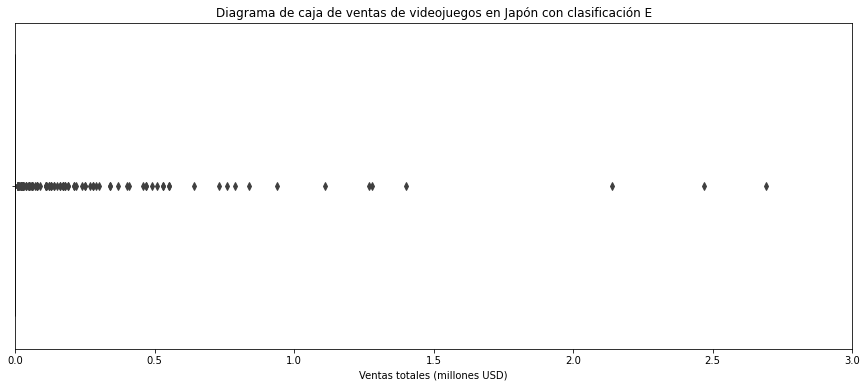

count    618.000000
mean       0.059353
std        0.283440
min        0.000000
25%        0.000000
50%        0.000000
75%        0.000000
max        4.390000
Name: jp_sales, dtype: float64

/opt/conda/lib/python3.9/site-packages/seaborn/_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


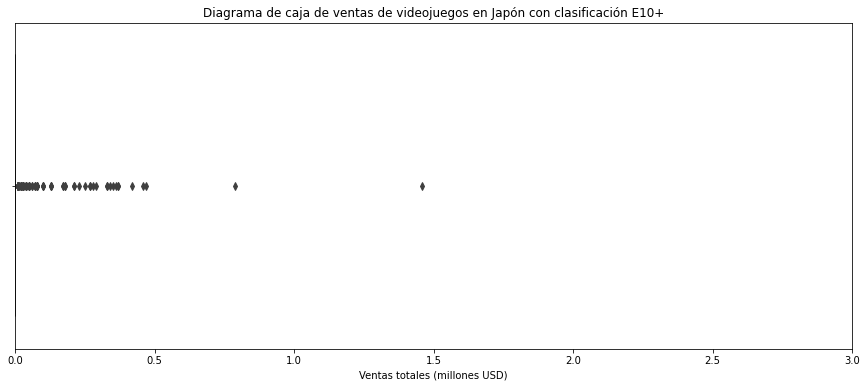

count    456.000000
mean       0.024627
std        0.102124
min        0.000000
25%        0.000000
50%        0.000000
75%        0.000000
max        1.460000
Name: jp_sales, dtype: float64

/opt/conda/lib/python3.9/site-packages/seaborn/_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


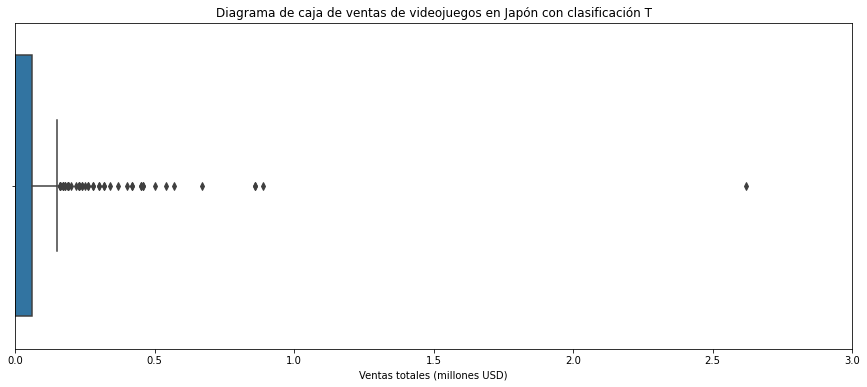

count    616.000000
mean       0.054205
std        0.146747
min        0.000000
25%        0.000000
50%        0.000000
75%        0.060000
max        2.620000
Name: jp_sales, dtype: float64

/opt/conda/lib/python3.9/site-packages/seaborn/_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


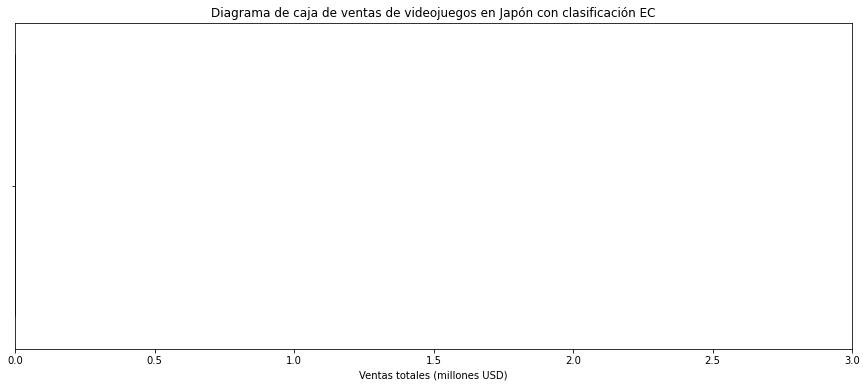

count    1.0
mean     0.0
std      NaN
min      0.0
25%      0.0
50%      0.0
75%      0.0
max      0.0
Name: jp_sales, dtype: float64

/opt/conda/lib/python3.9/site-packages/seaborn/_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


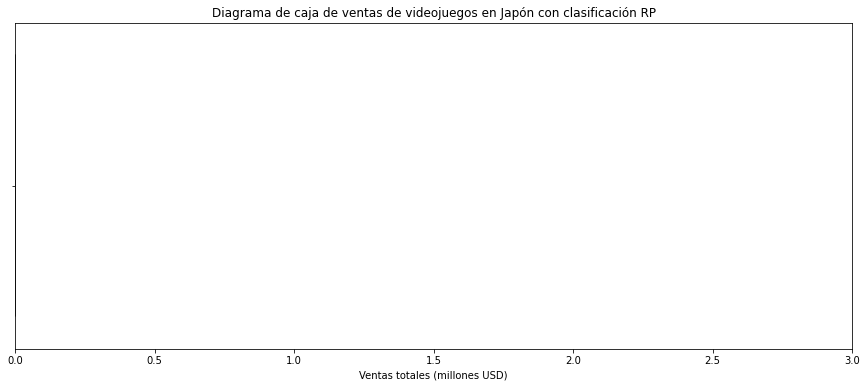

count    1.0
mean     0.0
std      NaN
min      0.0
25%      0.0
50%      0.0
75%      0.0
max      0.0
Name: jp_sales, dtype: float64

In [44]:
# Obtenemos diagramas de caja de ventas de todos los ratings
for rating in ratings:
    # Obtenemos los datos del rating
    data_rating = esrb_data[esrb_data['rating'] == rating]
    
    # Graficamos diagrama de caja
    plt.figure(figsize = (15, 6))
    sns.boxplot(data_rating['jp_sales'])
    plt.title(f'Diagrama de caja de ventas de videojuegos en Japón con clasificación {rating}')
    plt.xlabel("Ventas totales (millones USD)")
    plt.xlim(0, 3)
    plt.show()
    
    display(data_rating['jp_sales'].describe())

Observamos que los usuarios de Japón tienen preferencia por los videojuegos con clasificación Teen, después de estos prefieren consumir los videojuegos con clasificación Mature. 

### Conclusiones <a id='user_profiles_conclusions'></a>

#### Plataformas principales <a id='platforms_conclusions'></a>

Pudimos observar que la plataforma PlayStation, sobre todo la 3 y 4, es preferida por los usuarios de las 3 regiones estudiadas. Después de estas se prefieren las plataformas de Nintendo 3DS y Xbox.

#### Cuotas de mercado <a id='market_share_conclusions'></a>

In [45]:
market_shares = na_market_data[['platform', 'na_market_share']].merge(
    eu_market_data[['platform', 'eu_market_share']], 
    how='outer',
    on='platform',
    suffixes=[None, None]
)

market_shares = market_shares.merge(
    jp_market_data[['platform', 'jp_market_share']], 
    how='outer',
    on='platform',
    suffixes=[None, None]
)

display(market_shares)

,platform,na_market_share,eu_market_share,jp_market_share
0,X360,0.596246,0.307850,NaN
1,PS3,0.377629,0.366048,0.110847
2,PS4,0.346151,0.449131,0.050805
3,XOne,0.584484,NaN,NaN
4,3DS,0.320585,0.237656,0.390287
5,PC,NaN,0.580467,NaN
6,PSP,NaN,NaN,0.828680
7,PSV,NaN,NaN,0.405873


Observamos que para la plataforma:
- Xbox 360: El mercado Norteamericano representa el 60% de las ventas de videojuegos, mientras que el mercado Europeo representa el 30%. Ambos representan el 90% de las ventas en esta plataforma.
- PlayStation 3: Tanto el mercado Norteamericano como el Europeo tienen una cuota de mercado similar, siendo del 37-38%. Después les sigue el mercado Japonés con el 11% de cuota de mercado.
- PlayStation 4: El mercado Europeo es quien tiene mayor cuota, siendo esta del 45%. De ahí le siguen el mercado Norteamericano con 35% y el Japonés con el 5%. Esto nos inidica que el resto de regiones tienen aproximandamente el 15% de cuota del mercado.
- Nintendo 3DS: Para las tres regiones las cuotas de mercado son cercanas entre sí; para el mercado Japonés es del 39%, para el mercado Norteamericano es de 32% y para el Europeo es del 23%.

#### Géneros principales <a id='genres_conclusions'></a>

Se observó que los gustos de los usuarios de Norteamérica y de Europa son muy similares, prefiriendo los juegos de acción, disparos, deportes y juegos de rol en el mismo orden. En cuanto a los gustos de los usuarios japoneses, coinciden con los otros en cuanto a la preferencia por juegos de rol y de acción; de ahí sus gustos difieren.

#### Efecto de las clasificaciones ESRB en ventas regionales <a id='esrb_conclusions'></a>

En este caso observamos igualmente preferencias similares entre los usuarios Norteamericanos y Europeos, que tienden a comprar videojuegos con clasificación M, E10+ y E. Por su lado, Japón tiene un preferencia similar por los juegos con clasificación M, y comparte preferencia con Europa por los juegos con clasificación T. 

## 5. Pruebas de hipótesis <a id='hypothesis_testing'></a>

### Las calificaciones promedio de los usuarios para las plataformas Xbox One y PC son las mismas <a id='scores_xone_pc'></a>

Establecemos la hipótesis nula y alternativa, así como el nivel de significancia:
- H0: Las calificaciones promedio de los usuarios para las plataformas Xbox One y PC son iguales.
- H1: Las calificaciones promedio de los usuarios para las plataformas Xbox One y PC son diferentes.
- Alpha: 0.05

Como primer paso, debemos determinar si hay que considerar que las varianzas son iguales o diferentes. Para ello utilizamos el test de Levene, con un nivel de significancia del 5%.

In [ ]:
# Obtenemos los datos de puntuación para Xbox One y PC
xone_scores = relevant_data[relevant_data['platform'] == 'XOne']['user_score']
pc_scores = relevant_data[relevant_data['platform'] == 'PC']['user_score']

# Nivel crítico de significancia estadística
alpha1 = 0.05

# Realizamos el test de Levene
results1 = levene(xone_scores, pc_scores, nan_policy='omit')

# Imprimir el valor p
print("Valor p:", results1.pvalue)

# Comparar el valor p con el nivel de significancia estadística
if results1.pvalue > alpha1:
    print("No se rechaza la hipótesis nula. Las varianzas son similares.")
else:
    print("Se rechaza la hipótesis nula. Las varianzas son diferentes.")

Valor p: 0.019238606822499546
Se rechaza la hipótesis nula. Las varianzas son diferentes.


Procedemos probar la hipótesis de que las medias de las dos poblaciones independientes son iguales, considerando que sus varianzas son diferentes.

In [ ]:
# Nivel crítico de significancia estadística
alpha2 = 0.05

# Prueba la hipótesis de que las medias de las dos poblaciones independientes son iguales
results2 = st.ttest_ind(xone_scores, pc_scores, equal_var = False, nan_policy='omit')

# Imprime el valor p obtenido
print('valor p:', results2.pvalue)

# tu código: compara los valores p obtenidos con el nivel de significación estadística
if (results2.pvalue < alpha2):
    print("Rechazamos la hipótesis nula")
else:
    print("No podemos rechazar la hipótesis nula")

valor p: 0.6130712247638477
No podemos rechazar la hipótesis nula


La prueba de hipótesis nos dice que, al ser el valor p mayor que el valor de significancia establecido (5%), no podemos rechazar la hipótesis nula. Por lo tanto, las calificaciones promedio de los usuarios para las plataformas Xbox One y PC son iguales.

### Las calificaciones promedio de los usuarios para los géneros de Acción y Deportes son diferentes <a id='scores_action_sports'></a>

Establecemos la hipótesis nula y alternativa, así como el nivel de significancia:
- H0: Las calificaciones promedio de los usuarios para los géneros de Acción y Deportes son iguales.
- H1: Las calificaciones promedio de los usuarios para los géneros de Acción y Deportes son diferentes.
- Alpha: 0.05

Como primer paso, debemos determinar si las varianzas son iguales o diferentes. Para ello utilizamos el test de Levene, con un nivel de significancia del 5%.

In [ ]:
# Obtenemos los datos de puntuación para los géneros acción y deportes
action_scores = relevant_data[relevant_data['genre'] == 'Action']['user_score']
sports_scores = relevant_data[relevant_data['genre'] == 'Sports']['user_score']

# Nivel crítico de significancia estadística
alpha3 = 0.05

# Realizamos el test de Levene
results3 = levene(xone_scores, pc_scores, nan_policy='omit')

# Imprimir el valor p
print("Valor p:", results3.pvalue)

# Comparar el valor p con el nivel de significancia estadística
if results3.pvalue > alpha3:
    print("No se rechaza la hipótesis nula. Las varianzas son similares.")
else:
    print("Se rechaza la hipótesis nula. Las varianzas son diferentes.")

Valor p: 0.019238606822499546
Se rechaza la hipótesis nula. Las varianzas son diferentes.


Procedemos probar la hipótesis de que las medias de las dos poblaciones independientes son iguales, considerando que sus varianzas son diferentes.

In [ ]:
# Nivel crítico de significancia estadística
alpha4 = 0.05

# Prueba la hipótesis de que las medias de las dos poblaciones independientes son iguales
results4 = st.ttest_ind(action_scores, sports_scores, equal_var = False, nan_policy='omit')

# Imprime el valor p obtenido
print('valor p:', results4.pvalue)

# tu código: compara los valores p obtenidos con el nivel de significación estadística
if (results4.pvalue < alpha4):
    print("Rechazamos la hipótesis nula")
else:
    print("No podemos rechazar la hipótesis nula")

valor p: 8.285648549432565e-19
Rechazamos la hipótesis nula


Dado que el valor p es menor que el valor p de 5%, se rechaza la hipótesis nula. Por lo tanto, las calificaciones promedio de los usuarios para los géneros de Acción y Deportes son diferentes.

## 6. Conclusión general <a id='general_conclusion'></a>

Las plataformas con mayores ventas a lo largo de la historia son PS2, Xbox 360, PS3, Wii, DS y PS. Además, observamos que cuando una plataforma alcanza su máximo en ventas y comienza a declinar, tarda aproximadamente un año en que una nueva plataforma la reemplace. Las antiguas desaparecen entre 4 a 5 años después de que las nuevas comienzan a tener ventas.

En 2016, las plataformas líderes en ventas eran PS4, Xbox One y Nintendo 3DS, y se percibe una aparente reducción en las ventas hacia ese año. Sin embargo, PS4 y Xbox One podrían ser potencialmente rentables, a pesar de la caída en 2016.

También se observó una correlación positiva mediana entre las puntuaciones de los críticos y las ventas de videojuegos, sugiriendo que los usuarios consideran parcialmente estas puntuaciones. Mientras que la correlación entre las puntuaciones de usuarios y las ventas es casi nula, indicando que los usuarios no se basan en las puntuaciones de otros para comprar videojuegos.

Por otra parte, las ventas de ciertos juegos varían según la plataforma, sugiriendo que la plataforma puede influir en las preferencias de los usuarios. Además, los géneros de acción, disparos, juegos de rol y deportes tienen mayores ventas, mientras que los de rompecabezas y estrategia tienen menores ventas.

Por otra parte, se descubrió que Norteamérica y Europa representan el 90% de las ventas para la plataforma Xbox 360. Además, que ambas regiones tienen una cuota similar para la PlayStation 3 (37-38%) y para la PlayStation 4 el mercado Europeo lidera la cuota con un 45%, seguido del mercado Norteamericano con un 35%. Mientras que el mercado Japonés tiene una alta preferencia por el PSP, representando el 83% de las ventas. Además, el Nintendo 3DS muestra cuotas de mercado cercanas entre Japón (39%), Norteamérica (32%) y Europa (23%).

Además, los gustos de los usuarios de Norteamérica y Europa son muy similares, dando prioridad a los juegos de acción, disparos, deportes y juegos de rol. Los usuarios japoneses también comparten preferencia por juegos de rol y acción, aunque difieren en otros gustos.

En cuanto a las clasificaciones de juegos, Norteamérica y Europa comparten preferencias por juegos clasificados como M, E10+ y E. Japón muestra una preferencia similar por los juegos clasificados como M y comparte la preferencia por juegos clasificados como T con Europa.

Finalmente, también se descubrió que las calificaciones promedio de los usuarios para las plataformas Xbox One y PC son iguales, pero que las calificaciones promedio de los usuarios para los géneros de Acción y Deportes son diferentes.